# Proyek Akhir: Menyelesaikan Permasalahan Jaya Jaya Institut

- Nama: Selly Rizkiyah
- Email: sellyrizkiyah01@gmail.com
- Id Dicoding: selly_rk

# Persiapan

## Menyiapkan library yang dibutuhkan

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib

## Menyiapkan data yang digunakna

In [2]:
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/f4a7541bc3dfca0012e20778e135c03b3e76dc67/students_performance/data.csv"

df = pd.read_csv(url, sep=';')
df

Marital_status  Application_mode  Application_order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime_evening_attendance  Previous_qualification  \
0                              1                       1   
1                              1                       1   
2                              1                       1   
3                              1                       1   
4                              0                       1   
...                          ...                     ...   
4419                           1                       1   
4420                           1                       1   
4421                           1                       1   
4422                           1                       1   
4423                           1                       1   

      Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                            122.0            1                     19   
1                            160.0            1                      1   
2                            122.0            1                     37   
3                            122.0            1                     38   
4                            100.0            1                     37   
...                            ...          ...                    ...   
4419                         125.0            1                      1   
4420                         120.0          105                      1   
4421                         154.0            1                     37   
4422                         180.0            1                     37   
4423                         152.0           22                     38   

      Fathers_qualification  ...  Curricular_units_2nd_sem_credited  \
0                        12  ...                                  0   
1                         3  ...                                  0   
2                        37  ...                                  0   
3                        37  ...                                  0   
4                        38  ...                                  0   
...                     ...  ...                                ...   
4419                      1  ...                                  0   
4420                      1  ...                                  0   
4421                     37  ...                                  0   
4422                     37  ...                                  0   
4423                     37  ...                                  0   

      Curricular_units_2nd_sem_enrolled  Curricular_units_2nd_sem_evaluations  \
0                                     0                                     0   
1                                     6                                     6   
2                                     6                                     0   
3                                     6                                    10   
4                                     6                                     6   
...                                 ...                                   ...   
4419                                  6                                     8   
4420                                  6                           

# Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [4]:
print(df.columns)

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

Dapat dilihat kolom-kolom yang ada di data

Dataini mencakup informasi yang diketahui pada saat pendaftaran mahasiswa, terdiri dari 4424 baris dan 36 kolom, yaitu:
- 'Marital_status': status kawin,
- 'Application_mode': tipe saat mendaftar,
- 'Application_order': urutan daftar,
- 'Course': program studi,
- 'Daytime_evening_attendance': kehadiran kelas malam atau siang,
- 'Previous_qualification': pendidikan sebelumnya,
- 'Previous_qualification_grade': nilai pendidikan sebelumnya,
- 'Nacionality': kebangsaan,
- 'Mothers_qualification': pendidikan ibu,
- 'Fathers_qualification': pendidikan ayah,
- 'Mothers_occupation': pekerjaan ibu,
- 'Fathers_occupation': pekerjaan ayah,
- 'Admission_grade': kelas yang masuk,
- 'Displaced': status mengungsi,
- 'Educational_special_needs': status kebutuhan pendidikan spesial,
- 'Debtor': status hutang,
- 'Tuition_fees_up_to_date': status biaya pendidikan terkini,
- 'Gender': jenis kelamin,
- 'Scholarship_holder': status pemegang beasiswa,
- 'Age_at_enrollment': usia saat mendaftar,
- 'International': status mahasiswa internasional,
- 'Curricular_units_1st_sem_credited': jumlah sks semester 1
- 'Curricular_units_1st_sem_enrolled': jumlah sks saat mendaftar di semester 1
- 'Curricular_units_1st_sem_evaluations': jumlah sks yang diikuti saat ujian di semester 1
- 'Curricular_units_1st_sem_approved': jumlah sks yang lulus di semester 1
- 'Curricular_units_1st_sem_grade': jumlah sks yang mendapat nilai di semester 1,
- 'Curricular_units_1st_sem_without_evaluations': jumlah sks yang tidak ikut ujian di semester 1,
- 'Curricular_units_2nd_sem_credited': jumlah sks semester 2,
- 'Curricular_units_2nd_sem_enrolled': jumlah sks saat mendaftar di semester 2,
- 'Curricular_units_2nd_sem_evaluations': jumlah sks yang diikuti saat ujian di semester 2,
- 'Curricular_units_2nd_sem_approved': jumlah sks yang lulus di semester 2
- 'Curricular_units_2nd_sem_grade': jumlah sks yang mendapat nilai di semester 2,
- 'Curricular_units_2nd_sem_without_evaluations', jumlah sks yang mendapat nilai di semester 2,
- 'Unemployment_rate': tingkat pengangguran,
- 'Inflation_rate': tingkat inflasi,
- 'GDP': PDB,
- 'Status': status mahasiswa.


## Data Cleaning

In [5]:
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0
International                                   0
Curricular_units_1st_sem_credited               0
Curricular_units_1st_sem_enrolled               0
Curricular_units_1st_sem_evaluations            0
Curricular_units_1st_sem_approved               0
Curricular_units_1st_sem_grade                  0
Curricular_units_1st_sem_without_evaluations    0
Curricular_units_2nd_sem_credited               0
Curricular_units_2nd_sem_enrolled               0
Curricular_units_2nd_sem_evaluations            0
Curricular_units_2nd_sem_approved               0
Curricular_units_2nd_sem_grade                  0
Curricular_units_2nd_sem_without_evaluations    0
Unemployment_rate                               0
Inflation_rate                                  0
GDP                                             0
Status                                          0
dtype: int64

Dari hasil, terlihat jika data bersih dari nilai kosong.


### Pembersihan Data Numerik

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Seperti pada hasil di atas, tipe data di beberapa fitur belum sesuai. Misalnya seperti infomrasi yang dilihat pada metadata, beberapa fitur kategorikal non biner, menggunakan angka kode sebagai kategoriknya, bukan angka ordinal. Misalnya: pada Course 33 - Biofuel Production Technologies dan 171 - Animation and Multimedia Design. Nah, untuk menghindari kesalahan diartikan sebagai angka, maka perlu dilakukan pengubahan tipe data menjadi string pada beberapa fitur seperti ini

In [7]:
df['Course'] = df['Course'].astype(str)
df['Marital_status'] = df['Marital_status'].astype(str)
df['Application_mode'] = df['Application_mode'].astype(str)
df['Previous_qualification'] = df['Previous_qualification'].astype(str)
df['Nacionality'] = df['Nacionality'].astype(str)
df['Mothers_qualification'] = df['Mothers_qualification'].astype(str)
df['Fathers_qualification'] = df['Fathers_qualification'].astype(str)
df['Mothers_occupation'] = df['Mothers_occupation'].astype(str)
df['Fathers_occupation'] = df['Fathers_occupation'].astype(str)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Application_mode                              4424 non-null   object 
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   object 
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   object 
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   object 
 8   Mothers_qualification                         4424 non-null   object 
 9   Fathers_qualification                         4424 non-null   o

Terlihat jika tipe data berhasil diubah. Selanjutnya, dilakukan pemeriksaan statistika deskriptif pada data

In [9]:
df.describe(include='all')

Marital_status Application_mode  Application_order Course  \
count            4424             4424        4424.000000   4424   
unique              6               18                NaN     17   
top                 1                1                NaN   9500   
freq             3919             1708                NaN    766   
mean              NaN              NaN           1.727848    NaN   
std               NaN              NaN           1.313793    NaN   
min               NaN              NaN           0.000000    NaN   
25%               NaN              NaN           1.000000    NaN   
50%               NaN              NaN           1.000000    NaN   
75%               NaN              NaN           2.000000    NaN   
max               NaN              NaN           9.000000    NaN   

        Daytime_evening_attendance Previous_qualification  \
count                  4424.000000                   4424   
unique                         NaN                     17   
top                            NaN                      1   
freq                           NaN                   3717   
mean                      0.890823                    NaN   
std                       0.311897                    NaN   
min                       0.000000                    NaN   
25%                       1.000000                    NaN   
50%                       1.000000                    NaN   
75%                       1.000000                    NaN   
max                       1.000000                    NaN   

        Previous_qualification_grade Nacionality Mothers_qualification  \
count                    4424.000000        4424                  4424   
unique                           NaN          21                    29   
top                              NaN           1                     1   
freq                             NaN        4314                  1069   
mean                      132.613314         NaN                   NaN   
std                        13.188332         NaN                   NaN   
min                        95.000000         NaN                   NaN   
25%                       125.000000         NaN                   NaN   
50%                       133.100000         NaN                   NaN   
75%                       140.000000         NaN                   NaN   
max                       190.000000         NaN                   NaN   

       Fathers_qualification  ... Curricular_units_2nd_sem_credited  \
count                   4424  ...                       4424.000000   
unique                    34  ...                               NaN   
top                       37  ...                               NaN   
freq                    1209  ...                               NaN   
mean                     NaN  ...                          0.541817   
std                      NaN  ...                          1.918546   
min                      NaN  ...                          0.000000   
25%                      NaN  ...                          0.000000   
50%                      NaN  ...                          0.000000   
75%                      NaN  ...                          0.000000   
max                      NaN  ...                         19.000000   

       Curricular_units_2nd_sem_enrolled  \
count                        4424.000000   
unique                               NaN   
top                                  NaN   
freq                                 NaN   
mean                            6.232143   
std                             2.195951   
min                             0.000000   
25%                             5.000000   
50%                             6.000000   
75%                             7.000000   
max                            23.000000   

        Curricular_units_2nd_sem_evaluations  \
count                            4424.000000   
unique                                   NaN   
top                                      N

Dari hasil, nilai minimum negatif dan range sangat kecil pda GDP min -4.06, max 3.51, dimaana ini kemungkinan besar dalah data tahunan yang disisipkan ke seluruh siswa, sehingga, variasinya tidak berasal dari individu. Sama halnya seperti Unemployment_rate	Inflation_rate, maka ketiga variabel ini akan dihapus


In [10]:
df.drop(columns=["Unemployment_rate", "Inflation_rate", "GDP"], inplace=True)
df

Marital_status Application_mode  Application_order Course  \
0                 1               17                  5    171   
1                 1               15                  1   9254   
2                 1                1                  5   9070   
3                 1               17                  2   9773   
4                 2               39                  1   8014   
...             ...              ...                ...    ...   
4419              1                1                  6   9773   
4420              1                1                  2   9773   
4421              1                1                  1   9500   
4422              1                1                  1   9147   
4423              1               10                  1   9773   

      Daytime_evening_attendance Previous_qualification  \
0                              1                      1   
1                              1                      1   
2                              1                      1   
3                              1                      1   
4                              0                      1   
...                          ...                    ...   
4419                           1                      1   
4420                           1                      1   
4421                           1                      1   
4422                           1                      1   
4423                           1                      1   

      Previous_qualification_grade Nacionality Mothers_qualification  \
0                            122.0           1                    19   
1                            160.0           1                     1   
2                            122.0           1                    37   
3                            122.0           1                    38   
4                            100.0           1                    37   
...                            ...         ...                   ...   
4419                         125.0           1                     1   
4420                         120.0         105                     1   
4421                         154.0           1                    37   
4422                         180.0           1                    37   
4423                         152.0          22                    38   

     Fathers_qualification  ... Curricular_units_1st_sem_approved  \
0                       12  ...                                 0   
1                        3  ...                                 6   
2                       37  ...                                 0   
3                       37  ...                                 6   
4                       38  ...                                 5   
...                    ...  ...                               ...   
4419                     1  ...                                 5   
4420                     1  ...                                 6   
4421                    37  ...                                 7   
4422                    37  ...                                 5   
4423                    37  ...                                 6   

     Curricular_units_1st_sem_grade  \
0                          0.000000   
1                         14.000000   
2                          0.000000   
3                         13.428571   
4                         12.333333   
...                             ...   
4419                      13.600000   
4420                      12.000000   
4421                      14.912500   
4422                      13.800000   
4423                      11.666667   

      Curricular_units_1st_sem_without_evaluations  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
...             

Setelah menghilangkan beberapa feature tersebut, dilanjutkan proses pembersihan data. Pada proyek ini, dimulai dengan membersihkan feature numerik

In [11]:
numerical_columns = [
    'Application_order',
    'Previous_qualification_grade',
    'Admission_grade',
    'Age_at_enrollment',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations']

df[numerical_columns].describe()

Application_order  Previous_qualification_grade  Admission_grade  \
count        4424.000000                   4424.000000      4424.000000   
mean            1.727848                    132.613314       126.978119   
std             1.313793                     13.188332        14.482001   
min             0.000000                     95.000000        95.000000   
25%             1.000000                    125.000000       117.900000   
50%             1.000000                    133.100000       126.100000   
75%             2.000000                    140.000000       134.800000   
max             9.000000                    190.000000       190.000000   

       Age_at_enrollment  Curricular_units_1st_sem_credited  \
count        4424.000000                        4424.000000   
mean           23.265145                           0.709991   
std             7.587816                           2.360507   
min            17.000000                           0.000000   
25%            19.000000                           0.000000   
50%            20.000000                           0.000000   
75%            25.000000                           0.000000   
max            70.000000                          20.000000   

       Curricular_units_1st_sem_enrolled  \
count                        4424.000000   
mean                            6.270570   
std                             2.480178   
min                             0.000000   
25%                             5.000000   
50%                             6.000000   
75%                             7.000000   
max                            26.000000   

       Curricular_units_1st_sem_evaluations  \
count                           4424.000000   
mean                               8.299051   
std                                4.179106   
min                                0.000000   
25%                                6.000000   
50%                                8.000000   
75%                               10.000000   
max                               45.000000   

       Curricular_units_1st_sem_approved  Curricular_units_1st_sem_grade  \
count                        4424.000000                     4424.000000   
mean                            4.706600                       10.640822   
std                             3.094238                        4.843663   
min                             0.000000                        0.000000   
25%                             3.000000                       11.000000   
50%                             5.000000                       12.285714   
75%                             6.000000                       13.400000   
max                            26.000000                       18.875000   

       Curricular_units_1st_sem_without_evaluations  \
count                                   4424.000000   
mean                                       0.137658   
std                                        0.690880   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        0.000000   
max                                       12.000000   

       Curricular_units_2nd_sem_credited  Curricular_units_2nd_sem_enrolled  \
count                        4424.000000                        4424.000000   
mean                            0.541817                           6.232143   
std                             1.918546                           2.195951   
min                             0.000000                           0.000000   
25%                             0.000000                           5.000000   
50%                             0.000000                           6.000000   
75%                             0.000000                           7.000000   
max                            19.000000                          23.000000   

       Curricular_units_2nd_sem_evaluations  \
co

Dari hasil di atas, dapat dilihat
- jika nilai max pada Age_at_enrollment adalah 70, dimana ini cukup tinggi dari jarak Q3nya di 25
- nilai max Curricular_units_1st_sem_enrolled sebesar 26 juga cukup tinggi dari rata-ratanya di 6, begitu juga di Curricular_units_1st_sem_enrolled yang bernilai 23
- nilai max di Curricular_units_1st_sem_without_evaluations dan Curricular_units_2st_sem_without_evaluations yang sama-sama sebesar 12 juga bernilai cukup jauh dari rata-ratanya yang sama di 0

Untuk mlihat info lebih lanjut pada data di atas, dilakukan pemanggilan seperti ini

In [12]:
df[df["Age_at_enrollment"] == 70]

Marital_status Application_mode  Application_order Course  \
689              4               39                  2   9147   

     Daytime_evening_attendance Previous_qualification  \
689                           1                     19   

     Previous_qualification_grade Nacionality Mothers_qualification  \
689                         133.1           1                    37   

    Fathers_qualification  ... Curricular_units_1st_sem_approved  \
689                    37  ...                                 0   

    Curricular_units_1st_sem_grade  \
689                            0.0   

     Curricular_units_1st_sem_without_evaluations  \
689                                             0   

     Curricular_units_2nd_sem_credited  Curricular_units_2nd_sem_enrolled  \
689                                  0                                  5   

     Curricular_units_2nd_sem_evaluations  Curricular_units_2nd_sem_approved  \
689                                     9                                  0   

     Curricular_units_2nd_sem_grade  \
689                             0.0   

     Curricular_units_2nd_sem_without_evaluations   Status  
689                                             0  Dropout  

[1 rows x 34 columns]

In [13]:
df[df["Curricular_units_1st_sem_enrolled"] == 26]

Marital_status Application_mode  Application_order Course  \
3961              1               42                  1   9500   

      Daytime_evening_attendance Previous_qualification  \
3961                           1                      1   

      Previous_qualification_grade Nacionality Mothers_qualification  \
3961                         168.0           1                    37   

     Fathers_qualification  ... Curricular_units_1st_sem_approved  \
3961                     1  ...                                26   

     Curricular_units_1st_sem_grade  \
3961                      15.077778   

      Curricular_units_1st_sem_without_evaluations  \
3961                                             0   

      Curricular_units_2nd_sem_credited  Curricular_units_2nd_sem_enrolled  \
3961                                 14                                 17   

      Curricular_units_2nd_sem_evaluations  Curricular_units_2nd_sem_approved  \
3961                                    17                                 17   

      Curricular_units_2nd_sem_grade  \
3961                       15.023529   

      Curricular_units_2nd_sem_without_evaluations    Status  
3961                                             0  Graduate  

[1 rows x 34 columns]

In [14]:
df[df["Curricular_units_1st_sem_without_evaluations"] == 12]

Marital_status Application_mode  Application_order Course  \
747               1               43                  1   9085   
3635              1               42                  1   9500   

      Daytime_evening_attendance Previous_qualification  \
747                            1                      1   
3635                           1                      6   

      Previous_qualification_grade Nacionality Mothers_qualification  \
747                          110.0          25                    38   
3635                         141.0           1                    37   

     Fathers_qualification  ... Curricular_units_1st_sem_approved  \
747                     38  ...                                18   
3635                     1  ...                                18   

     Curricular_units_1st_sem_grade  \
747                       12.500000   
3635                      14.933333   

      Curricular_units_1st_sem_without_evaluations  \
747                                             12   
3635                                            12   

      Curricular_units_2nd_sem_credited  Curricular_units_2nd_sem_enrolled  \
747                                  10                                 13   
3635                                 12                                 21   

      Curricular_units_2nd_sem_evaluations  Curricular_units_2nd_sem_approved  \
747                                     26                                 12   
3635                                    33                                 18   

      Curricular_units_2nd_sem_grade  \
747                        11.428571   
3635                       14.933333   

      Curricular_units_2nd_sem_without_evaluations    Status  
747                                              6  Graduate  
3635                                            12  Graduate  

[2 rows x 34 columns]

In [15]:
df[df["Curricular_units_2nd_sem_without_evaluations"] == 12]

Marital_status Application_mode  Application_order Course  \
533               1               44                  1   9070   
3635              1               42                  1   9500   

      Daytime_evening_attendance Previous_qualification  \
533                            1                     39   
3635                           1                      6   

      Previous_qualification_grade Nacionality Mothers_qualification  \
533                          120.0           1                     1   
3635                         141.0           1                    37   

     Fathers_qualification  ... Curricular_units_1st_sem_approved  \
533                     19  ...                                 0   
3635                     1  ...                                18   

     Curricular_units_1st_sem_grade  \
533                        0.000000   
3635                      14.933333   

      Curricular_units_1st_sem_without_evaluations  \
533                                              6   
3635                                            12   

      Curricular_units_2nd_sem_credited  Curricular_units_2nd_sem_enrolled  \
533                                   0                                  6   
3635                                 12                                 21   

      Curricular_units_2nd_sem_evaluations  Curricular_units_2nd_sem_approved  \
533                                     12                                  0   
3635                                    33                                 18   

      Curricular_units_2nd_sem_grade  \
533                         0.000000   
3635                       14.933333   

      Curricular_units_2nd_sem_without_evaluations    Status  
533                                             12   Dropout  
3635                                            12  Graduate  

[2 rows x 34 columns]

Nilai-nilai outlier di atas perlu diatasi karena akan mengganggu di tahap pemodelan jika dibiarkan, walaupun jumlahnya sedikit. Untuk memperbaikinya, mengubah sebagian besar invalid value sebagai missing value atau nilai nol dengan pemberian aturan batasan dengan lambda dan np.nan


Misalnya, Age_at_enrollment dibatasi maksimal usia 40, sementara usia di atasnya akan di nol kan. Curricular_units_sem_enrolled dibatasi menjadi 20 dan evaluationnya 8. serta grade di angka maskimal 20

In [16]:
df["Age_at_enrollment"] = df["Age_at_enrollment"].apply(lambda x: np.nan if x < 17 or x > 40 else x)
df["Curricular_units_1st_sem_enrolled"] = df["Curricular_units_1st_sem_enrolled"].apply(lambda x: np.nan if x > 20 else x)
df["Curricular_units_2nd_sem_enrolled"] = df["Curricular_units_2nd_sem_enrolled"].apply(lambda x: np.nan if x > 20 else x)
df["Curricular_units_1st_sem_without_evaluations"] = df["Curricular_units_1st_sem_without_evaluations"].apply(lambda x: np.nan if x > 8 else x)
df["Curricular_units_2nd_sem_without_evaluations"] = df["Curricular_units_2nd_sem_without_evaluations"].apply(lambda x: np.nan if x > 8 else x)
df["Curricular_units_1st_sem_grade"] = df["Curricular_units_1st_sem_grade"].apply(lambda x: np.nan if x > 20 else x)
df["Curricular_units_2nd_sem_grade"] = df["Curricular_units_2nd_sem_grade"].apply(lambda x: np.nan if x > 20 else x)

df[numerical_columns].describe(include="all")

Application_order  Previous_qualification_grade  Admission_grade  \
count        4424.000000                   4424.000000      4424.000000   
mean            1.727848                    132.613314       126.978119   
std             1.313793                     13.188332        14.482001   
min             0.000000                     95.000000        95.000000   
25%             1.000000                    125.000000       117.900000   
50%             1.000000                    133.100000       126.100000   
75%             2.000000                    140.000000       134.800000   
max             9.000000                    190.000000       190.000000   

       Age_at_enrollment  Curricular_units_1st_sem_credited  \
count         4199.00000                        4424.000000   
mean            22.00262                           0.709991   
std              5.28630                           2.360507   
min             17.00000                           0.000000   
25%             19.00000                           0.000000   
50%             20.00000                           0.000000   
75%             23.00000                           0.000000   
max             40.00000                          20.000000   

       Curricular_units_1st_sem_enrolled  \
count                        4415.000000   
mean                            6.238505   
std                             2.377581   
min                             0.000000   
25%                             5.000000   
50%                             6.000000   
75%                             7.000000   
max                            19.000000   

       Curricular_units_1st_sem_evaluations  \
count                           4424.000000   
mean                               8.299051   
std                                4.179106   
min                                0.000000   
25%                                6.000000   
50%                                8.000000   
75%                               10.000000   
max                               45.000000   

       Curricular_units_1st_sem_approved  Curricular_units_1st_sem_grade  \
count                        4424.000000                     4424.000000   
mean                            4.706600                       10.640822   
std                             3.094238                        4.843663   
min                             0.000000                        0.000000   
25%                             3.000000                       11.000000   
50%                             5.000000                       12.285714   
75%                             6.000000                       13.400000   
max                            26.000000                       18.875000   

       Curricular_units_1st_sem_without_evaluations  \
count                                   4421.000000   
mean                                       0.130061   
std                                        0.626022   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        0.000000   
max                                        8.000000   

       Curricular_units_2nd_sem_credited  Curricular_units_2nd_sem_enrolled  \
count                        4424.000000                        4421.000000   
mean                            0.541817                           6.221217   
std                             1.918546                           2.156105   
min                             0.000000                           0.000000   
25%                             0.000000                           5.000000   
50%                             0.000000                           6.000000   
75%                             0.000000                           7.000000   
max                            19.000000                          19.000000   

       Curricular_units_2nd_sem_evaluations  \
co

Lalu mengecek missing value yang terdapat dalam feature numerik.

In [17]:
numerical_columns = [
    'Application_order',
    'Previous_qualification_grade',
    'Admission_grade',
    'Age_at_enrollment',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations']

df[numerical_columns].isnull().sum()

Application_order                                 0
Previous_qualification_grade                      0
Admission_grade                                   0
Age_at_enrollment                               225
Curricular_units_1st_sem_credited                 0
Curricular_units_1st_sem_enrolled                 9
Curricular_units_1st_sem_evaluations              0
Curricular_units_1st_sem_approved                 0
Curricular_units_1st_sem_grade                    0
Curricular_units_1st_sem_without_evaluations      3
Curricular_units_2nd_sem_credited                 0
Curricular_units_2nd_sem_enrolled                 3
Curricular_units_2nd_sem_evaluations              0
Curricular_units_2nd_sem_approved                 0
Curricular_units_2nd_sem_grade                    0
Curricular_units_2nd_sem_without_evaluations      2
dtype: int64

Untuk membersihkan missing value tersebut, dilakukan pengisian nilai missing value dengan nilai median data

In [18]:
def fill_numerical_missing_value(column, df):
    df = df.copy()
    fill_value = df[column].median()
    df[column] = df[column].fillna(fill_value)
    return df[column]

In [19]:
missing_numerical_columns = [
    'Age_at_enrollment',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_without_evaluations'
]

for col in missing_numerical_columns:
    df[col] = fill_numerical_missing_value(column=col, df=df)

Kode di atas akan membersihkan missing value yang terdapat dalam fitur numerik tahap sebelumnya.

In [20]:
numerical_columns = [
    'Application_order',
    'Previous_qualification_grade',
    'Admission_grade',
    'Age_at_enrollment',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations']

df[numerical_columns].describe()

Application_order  Previous_qualification_grade  Admission_grade  \
count        4424.000000                   4424.000000      4424.000000   
mean            1.727848                    132.613314       126.978119   
std             1.313793                     13.188332        14.482001   
min             0.000000                     95.000000        95.000000   
25%             1.000000                    125.000000       117.900000   
50%             1.000000                    133.100000       126.100000   
75%             2.000000                    140.000000       134.800000   
max             9.000000                    190.000000       190.000000   

       Age_at_enrollment  Curricular_units_1st_sem_credited  \
count        4424.000000                        4424.000000   
mean           21.900769                           0.709991   
std             5.168852                           2.360507   
min            17.000000                           0.000000   
25%            19.000000                           0.000000   
50%            20.000000                           0.000000   
75%            23.000000                           0.000000   
max            40.000000                          20.000000   

       Curricular_units_1st_sem_enrolled  \
count                        4424.000000   
mean                            6.238020   
std                             2.375185   
min                             0.000000   
25%                             5.000000   
50%                             6.000000   
75%                             7.000000   
max                            19.000000   

       Curricular_units_1st_sem_evaluations  \
count                           4424.000000   
mean                               8.299051   
std                                4.179106   
min                                0.000000   
25%                                6.000000   
50%                                8.000000   
75%                               10.000000   
max                               45.000000   

       Curricular_units_1st_sem_approved  Curricular_units_1st_sem_grade  \
count                        4424.000000                     4424.000000   
mean                            4.706600                       10.640822   
std                             3.094238                        4.843663   
min                             0.000000                        0.000000   
25%                             3.000000                       11.000000   
50%                             5.000000                       12.285714   
75%                             6.000000                       13.400000   
max                            26.000000                       18.875000   

       Curricular_units_1st_sem_without_evaluations  \
count                                   4424.000000   
mean                                       0.129973   
std                                        0.625819   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        0.000000   
max                                        8.000000   

       Curricular_units_2nd_sem_credited  Curricular_units_2nd_sem_enrolled  \
count                        4424.000000                        4424.000000   
mean                            0.541817                           6.221067   
std                             1.918546                           2.155382   
min                             0.000000                           0.000000   
25%                             0.000000                           5.000000   
50%                             0.000000                           6.000000   
75%                             0.000000                           7.000000   
max                            19.000000                          19.000000   

       Curricular_units_2nd_sem_evaluations  \
co

Dari hasil deskripsi baru di atas, nilai max nya tampak jauh lebih normal dengan meannya

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Application_mode                              4424 non-null   object 
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   object 
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   object 
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   object 
 8   Mothers_qualification                         4424 non-null   object 
 9   Fathers_qualification                         4424 non-null   o

### Pembersihan Data Kategorikal

In [22]:
categorical_columns = [
    'Marital_status',
    'Application_mode',
    'Course',
    'Daytime_evening_attendance',
    'Previous_qualification',
    'Nacionality',
    'Mothers_qualification',
    'Fathers_qualification',
    'Mothers_occupation',
    'Fathers_occupation',
    'Displaced',
    'Educational_special_needs',
    'Debtor',
    'Tuition_fees_up_to_date',
    'Gender',
    'Scholarship_holder',
    'International'
]

for col in categorical_columns:
    print(df[col].value_counts())

Marital_status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64
Application_mode
1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
57       1
26       1
27       1
Name: count, dtype: int64
Course
9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: count, dtype: int64
Daytime_evening_attendance
1    3941
0     483
Name: count, dtype: int64
Previous_qualification
1     3717
39     219
19     162
3      126
12      45
40      40
42      36
2       23
6       16
9       11
4        8
38       7
43       6
10       4
15       2
5        1
14       1
Name: count, dtype: int64
Nacionality
1      4314
41       38
26       14
6        13
22       13
24        5
100       3
11        3
103 

Jika melihat hasil di atas, banyak data kategorik yang hanya memiliki 1 nilai di beberpaa kategorinya, untuk itu dilakukan inisialisasi penggantian dengan "Others" untuk menggabungkan bberapa data kategorik yang memiliki nilai sangat kecil, untuk menjadi satu kategori dengan nama "Others" atau Lainnya.

In [23]:
def replace_rare_categories(df, column, threshold=10):
    value_counts = df[column].value_counts()
    rare_values = value_counts[value_counts < threshold].index
    df[column] = df[column].apply(lambda x: 'Others' if x in rare_values else x)
    return df

In [24]:
categorical_columns = [
    'Marital_status',
    'Application_mode',
    'Course',
    'Previous_qualification',
    'Nacionality',
    'Mothers_qualification',
    'Fathers_qualification',
    'Mothers_occupation',
    'Fathers_occupation',
]

for col in categorical_columns:
    df = replace_rare_categories(df, col, threshold=10)

Pada kode di atas, threshold diatur 10, artinya Others akan menggantikan nilai satu atau lebih kategori yang memiliki nilai data < 10.

In [25]:
categorical_columns = [
    'Marital_status',
    'Application_mode',
    'Course',
    'Daytime_evening_attendance',
    'Previous_qualification',
    'Nacionality',
    'Mothers_qualification',
    'Fathers_qualification',
    'Mothers_occupation',
    'Fathers_occupation',
    'Displaced',
    'Educational_special_needs',
    'Debtor',
    'Tuition_fees_up_to_date',
    'Gender',
    'Scholarship_holder',
    'International'
]

for col in categorical_columns:
    print(df[col].value_counts())

Marital_status
1         3919
2          379
4           91
5           25
Others      10
Name: count, dtype: int64
Application_mode
1         1708
17         872
39         785
43         312
44         213
7          139
18         124
42          77
51          59
16          38
53          35
15          30
5           16
10          10
Others       6
Name: count, dtype: int64
Course
9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: count, dtype: int64
Daytime_evening_attendance
1    3941
0     483
Name: count, dtype: int64
Previous_qualification
1         3717
39         219
19         162
3          126
12          45
40          40
42          36
Others      29
2           23
6           16
9           11
Name: count, dtype: int64
Nacionality
1         4314
41          38
Others      32
26          14
6           13
22   

Nilai Others berhasil dibuat di beberapa fitur, sehingga nilai tampak lebih ringkas

In [26]:
df[categorical_columns].isnull().sum()

Marital_status                0
Application_mode              0
Course                        0
Daytime_evening_attendance    0
Previous_qualification        0
Nacionality                   0
Mothers_qualification         0
Fathers_qualification         0
Mothers_occupation            0
Fathers_occupation            0
Displaced                     0
Educational_special_needs     0
Debtor                        0
Tuition_fees_up_to_date       0
Gender                        0
Scholarship_holder            0
International                 0
dtype: int64

Berdasarkan hasil tersebut, data kategorik terlihat tidak memiliki missing values

## Data Aggregasi

Karena pada data seperti Curricular_units_1st_sem_enrolled dan Curricular_units_2st_sem_enrolled, serta Curricular_units_1st_sem_approved dan Curricular_units_2st_sem_approved dan sejenisnya hampir mirip, maka kedua data ini digabungkan dan dibuat nama baru

Keempat fitur yang hampir sama digabung, sementara ftur mengandung grade dihitung dengan rata-rata sebelum digabung

In [27]:
df_aggr = df.copy()

df_aggr['Total_enrolled'] = df_aggr['Curricular_units_1st_sem_enrolled'] + df_aggr['Curricular_units_2nd_sem_enrolled']
df_aggr['Total_approved'] = df_aggr['Curricular_units_1st_sem_approved'] + df_aggr['Curricular_units_2nd_sem_approved']
df_aggr['Total_evaluations'] = df_aggr['Curricular_units_1st_sem_evaluations'] + df_aggr['Curricular_units_2nd_sem_evaluations']
df_aggr['Total_without_evaluations'] = df_aggr['Curricular_units_1st_sem_without_evaluations'] + df_aggr['Curricular_units_2nd_sem_without_evaluations']

df_aggr['Avg_grade'] = (
    (df_aggr['Curricular_units_1st_sem_grade'] + df_aggr['Curricular_units_2nd_sem_grade']) / 2
)

cols_to_drop = [col for col in df_aggr.columns if 'Curricular_units_1st_sem' in col or 'Curricular_units_2nd_sem' in col]
df_aggr.drop(columns=cols_to_drop, inplace=True)

In [28]:
df_aggr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Marital_status                4424 non-null   object 
 1   Application_mode              4424 non-null   object 
 2   Application_order             4424 non-null   int64  
 3   Course                        4424 non-null   object 
 4   Daytime_evening_attendance    4424 non-null   int64  
 5   Previous_qualification        4424 non-null   object 
 6   Previous_qualification_grade  4424 non-null   float64
 7   Nacionality                   4424 non-null   object 
 8   Mothers_qualification         4424 non-null   object 
 9   Fathers_qualification         4424 non-null   object 
 10  Mothers_occupation            4424 non-null   object 
 11  Fathers_occupation            4424 non-null   object 
 12  Admission_grade               4424 non-null   float64
 13  Dis

Fitur baru berhasil terbuat

## EDA

In [29]:
cleaned_df = df_aggr.copy()

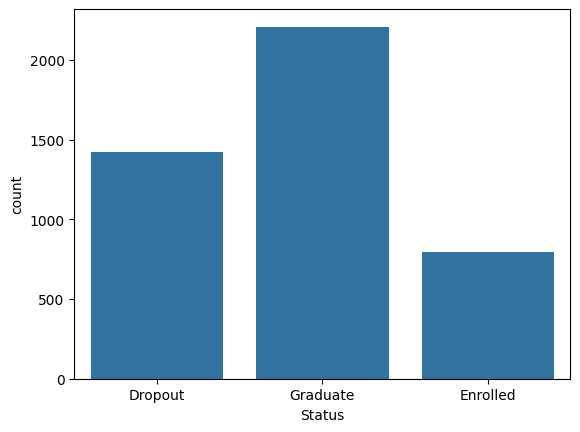

In [30]:
sns.countplot(data=cleaned_df, x="Status")
plt.show()

In [31]:
cleaned_df.Status.value_counts()

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Pada visualisasi data di atas, terlihat bahwa data didominasi oleh kategori Graduate. Sementara Enrolled paling sedikit. Pada konteks ini, imbalanced data tetap dibiarkan krena menjaga informasi yang terkandung dalam data

### Statistik deskriptif data

In [32]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Marital_status                4424 non-null   object 
 1   Application_mode              4424 non-null   object 
 2   Application_order             4424 non-null   int64  
 3   Course                        4424 non-null   object 
 4   Daytime_evening_attendance    4424 non-null   int64  
 5   Previous_qualification        4424 non-null   object 
 6   Previous_qualification_grade  4424 non-null   float64
 7   Nacionality                   4424 non-null   object 
 8   Mothers_qualification         4424 non-null   object 
 9   Fathers_qualification         4424 non-null   object 
 10  Mothers_occupation            4424 non-null   object 
 11  Fathers_occupation            4424 non-null   object 
 12  Admission_grade               4424 non-null   float64
 13  Dis

In [33]:
cleaned_df.describe(include="all")

Marital_status Application_mode  Application_order Course  \
count            4424             4424        4424.000000   4424   
unique              5               15                NaN     17   
top                 1                1                NaN   9500   
freq             3919             1708                NaN    766   
mean              NaN              NaN           1.727848    NaN   
std               NaN              NaN           1.313793    NaN   
min               NaN              NaN           0.000000    NaN   
25%               NaN              NaN           1.000000    NaN   
50%               NaN              NaN           1.000000    NaN   
75%               NaN              NaN           2.000000    NaN   
max               NaN              NaN           9.000000    NaN   

        Daytime_evening_attendance Previous_qualification  \
count                  4424.000000                   4424   
unique                         NaN                     11   
top                            NaN                      1   
freq                           NaN                   3717   
mean                      0.890823                    NaN   
std                       0.311897                    NaN   
min                       0.000000                    NaN   
25%                       1.000000                    NaN   
50%                       1.000000                    NaN   
75%                       1.000000                    NaN   
max                       1.000000                    NaN   

        Previous_qualification_grade Nacionality Mothers_qualification  \
count                    4424.000000        4424                  4424   
unique                           NaN           6                    11   
top                              NaN           1                     1   
freq                             NaN        4314                  1069   
mean                      132.613314         NaN                   NaN   
std                        13.188332         NaN                   NaN   
min                        95.000000         NaN                   NaN   
25%                       125.000000         NaN                   NaN   
50%                       133.100000         NaN                   NaN   
75%                       140.000000         NaN                   NaN   
max                       190.000000         NaN                   NaN   

       Fathers_qualification  ...       Gender Scholarship_holder  \
count                   4424  ...  4424.000000        4424.000000   
unique                    13  ...          NaN                NaN   
top                       37  ...          NaN                NaN   
freq                    1209  ...          NaN                NaN   
mean                     NaN  ...     0.351718           0.248418   
std                      NaN  ...     0.477560           0.432144   
min                      NaN  ...     0.000000           0.000000   
25%                      NaN  ...     0.000000           0.000000   
50%                      NaN  ...     0.000000           0.000000   
75%                      NaN  ...     1.000000           0.000000   
max                      NaN  ...     1.000000           1.000000   

        Age_at_enrollment  International    Status  Total_enrolled  \
count         4424.000000    4424.000000      4424     4424.000000   
unique                NaN            NaN         3             NaN   
top                   NaN            NaN  Graduate             NaN   
freq                  NaN            NaN      2209             NaN   
mean            21.900769       0.024864       NaN       12.459087   
std              5.168852       0.155729       NaN        4.441409   
min             17.000000       0.000000       NaN        0.000000   
25%             19.000000       0.000000       NaN       10.000000   
50%             20.000000       0.000000       NaN       12.000000   
75%             23.000000       0.00000

Berdasarkan hasil tersebut, dapat dilihat beberapa gambaran parameter statistik dari dataset yang dimiliki. Tahap berikutnya adalah membuat visualisasi untuk mempermudah dalam memahami pola dan insight yang terdapat dalam data.

### Visualisasi distribusi data numerik

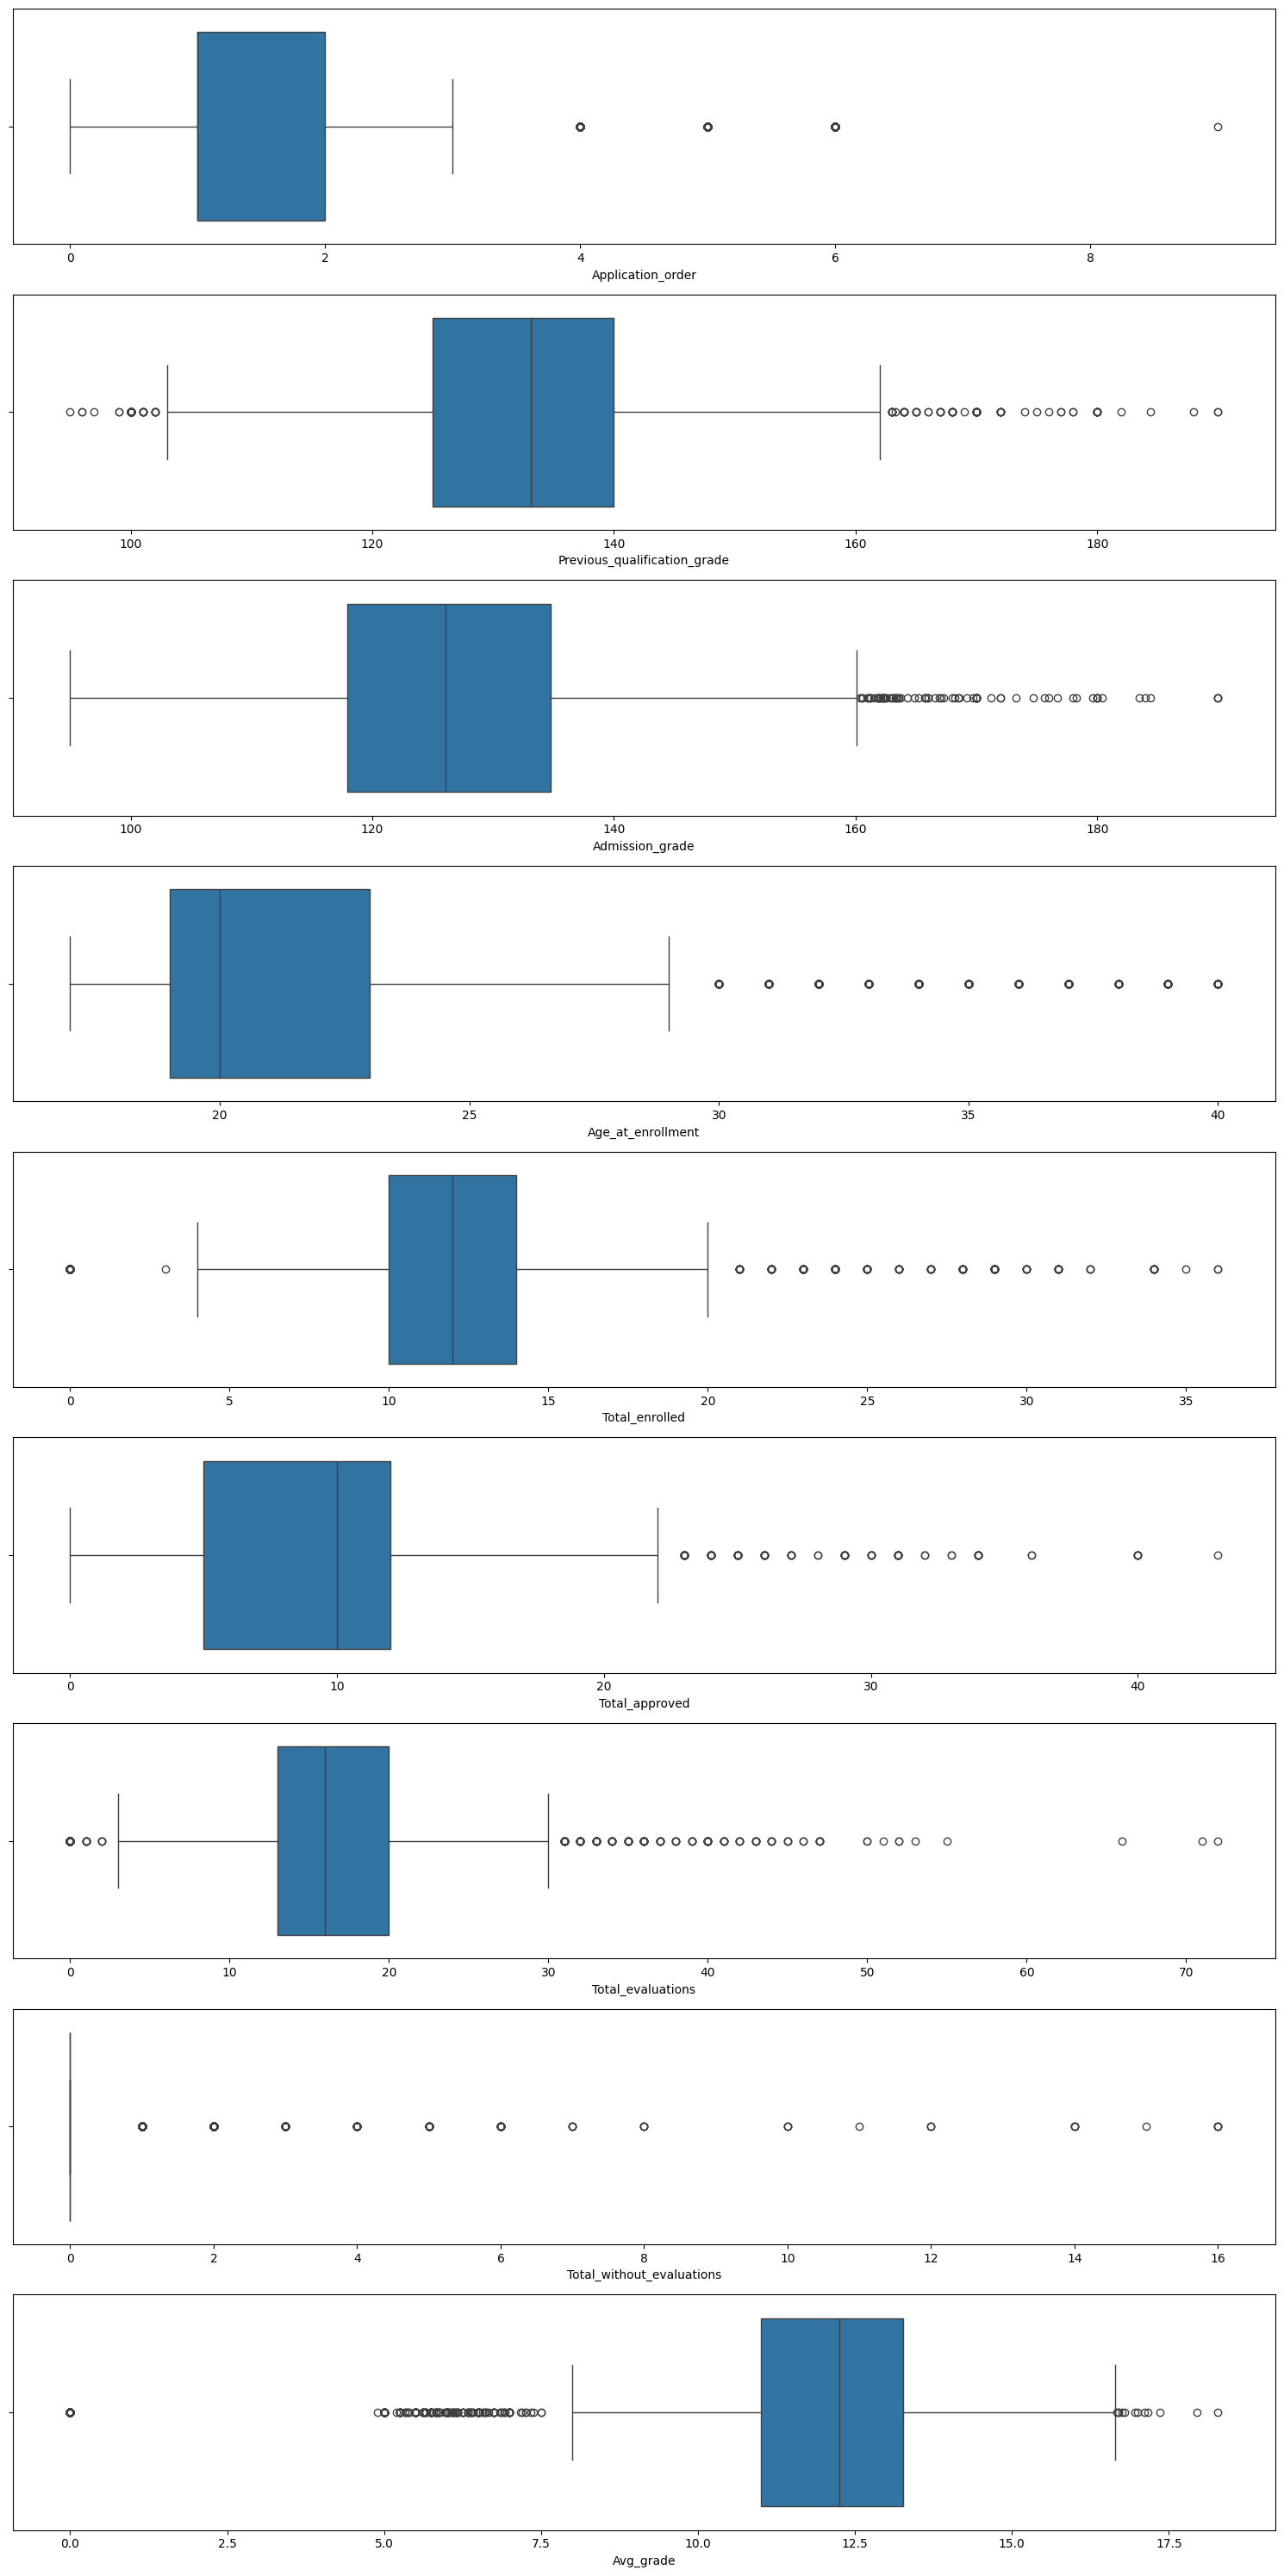

In [34]:
numerical_columns = [
    'Application_order',
    'Previous_qualification_grade',
    'Admission_grade',
    'Age_at_enrollment',
    'Total_enrolled',
    'Total_approved',
    'Total_evaluations',
    'Total_without_evaluations',
    'Avg_grade']

def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1,figsize=(15,30))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()

numerical_dis_plot(
    features=numerical_columns,
    df=cleaned_df
)

Pada visualisasi data di atas terlihat beberapa feature yang memiliki outlier seperti pada feature Total_without_Evaluation. Hal ini terjadi karena nilainya terlalu kecil. Namun, pada beberapa outlier lainnya, nilai dapat dianggap valid dan diabaikan, karena terkadang beerapa kasus tertentu membuat data menjadi memiliki beberpaa outlier.

### Visualisasi distribusi data kategorik

Pertama kita coba membuat visualisasi data untuk feature kategorik untuk melihat gambaran jumlah data untuk setiap kategori. Berikut merupakan contoh kode untuk melakukannya.

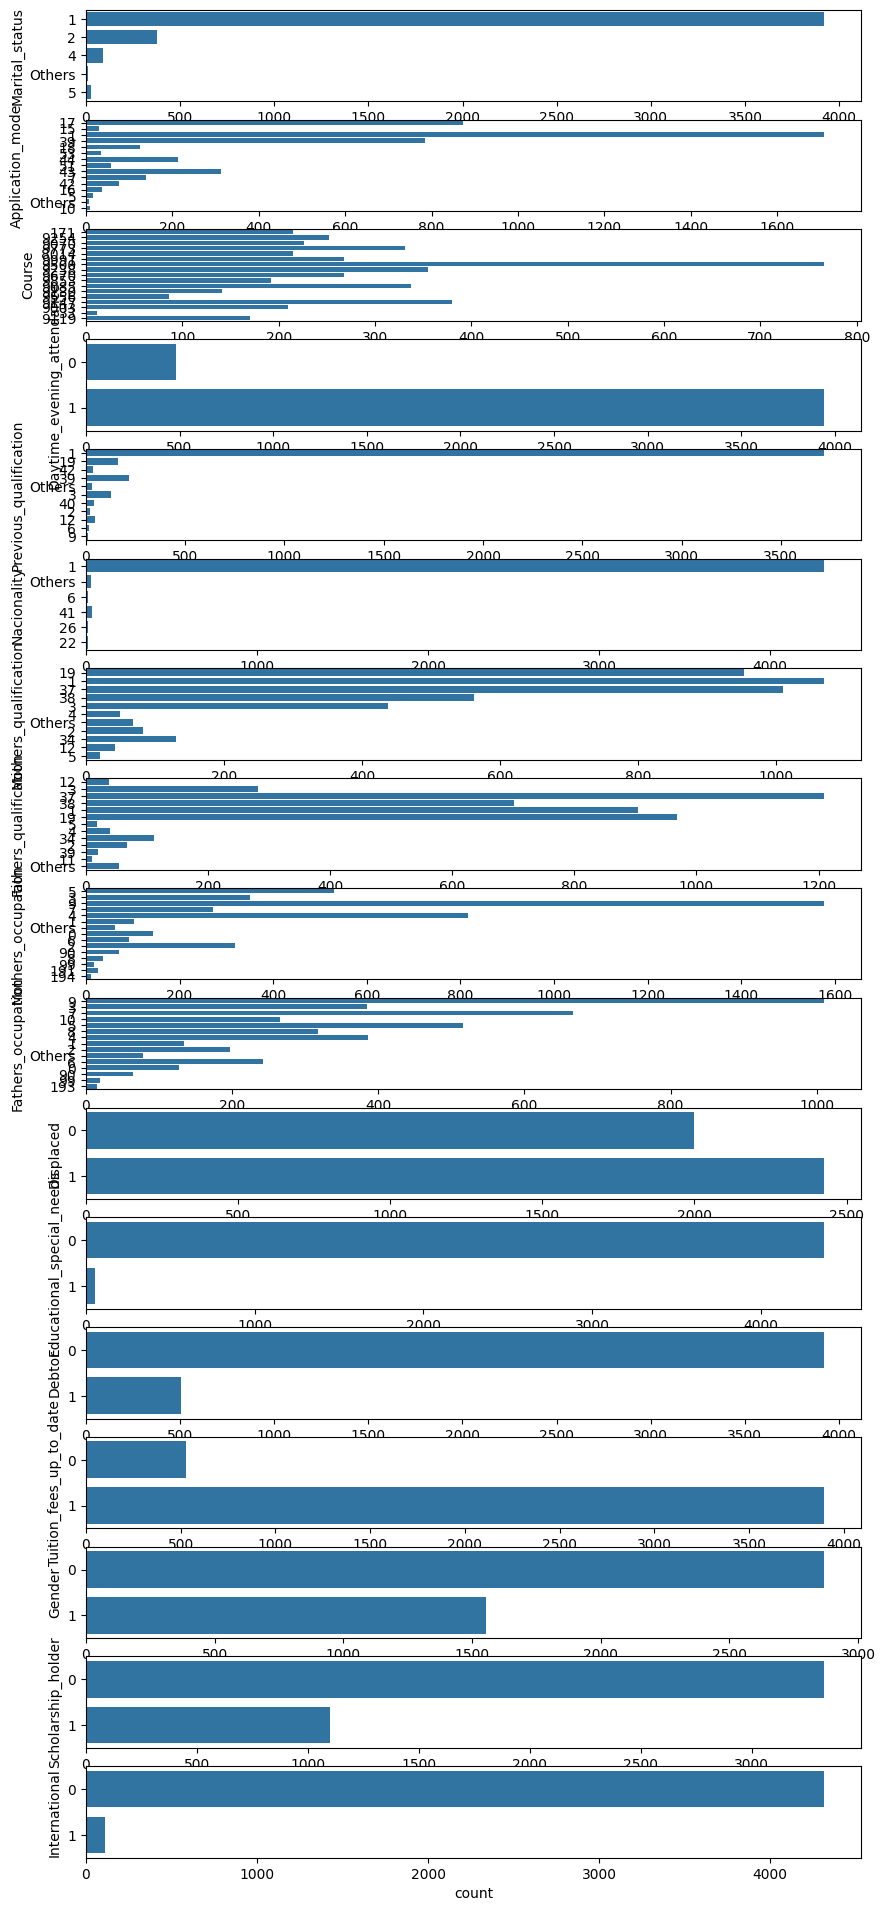

In [35]:
categorical_columns = [
    'Marital_status',
    'Application_mode',
    'Course',
    'Daytime_evening_attendance',
    'Previous_qualification',
    'Nacionality',
    'Mothers_qualification',
    'Fathers_qualification',
    'Mothers_occupation',
    'Fathers_occupation',
    'Displaced',
    'Educational_special_needs',
    'Debtor',
    'Tuition_fees_up_to_date',
    'Gender',
    'Scholarship_holder',
    'International'
]

fig, ax = plt.subplots(len(categorical_columns), 1,figsize=(10,24))
for i, feature in enumerate(categorical_columns):
  sns.countplot(data=cleaned_df, y=feature, ax=ax[i])
plt.show()

Berdasarkan visualisasi data di atas, terlihat beberapa kategori yang mendominasi dalam suatu feature. Fenomena ini sering disebut imbalance data yang berpotensi mengakibatkan terjadinya bias.

### Visualisasi distribusi numerik dengan target label

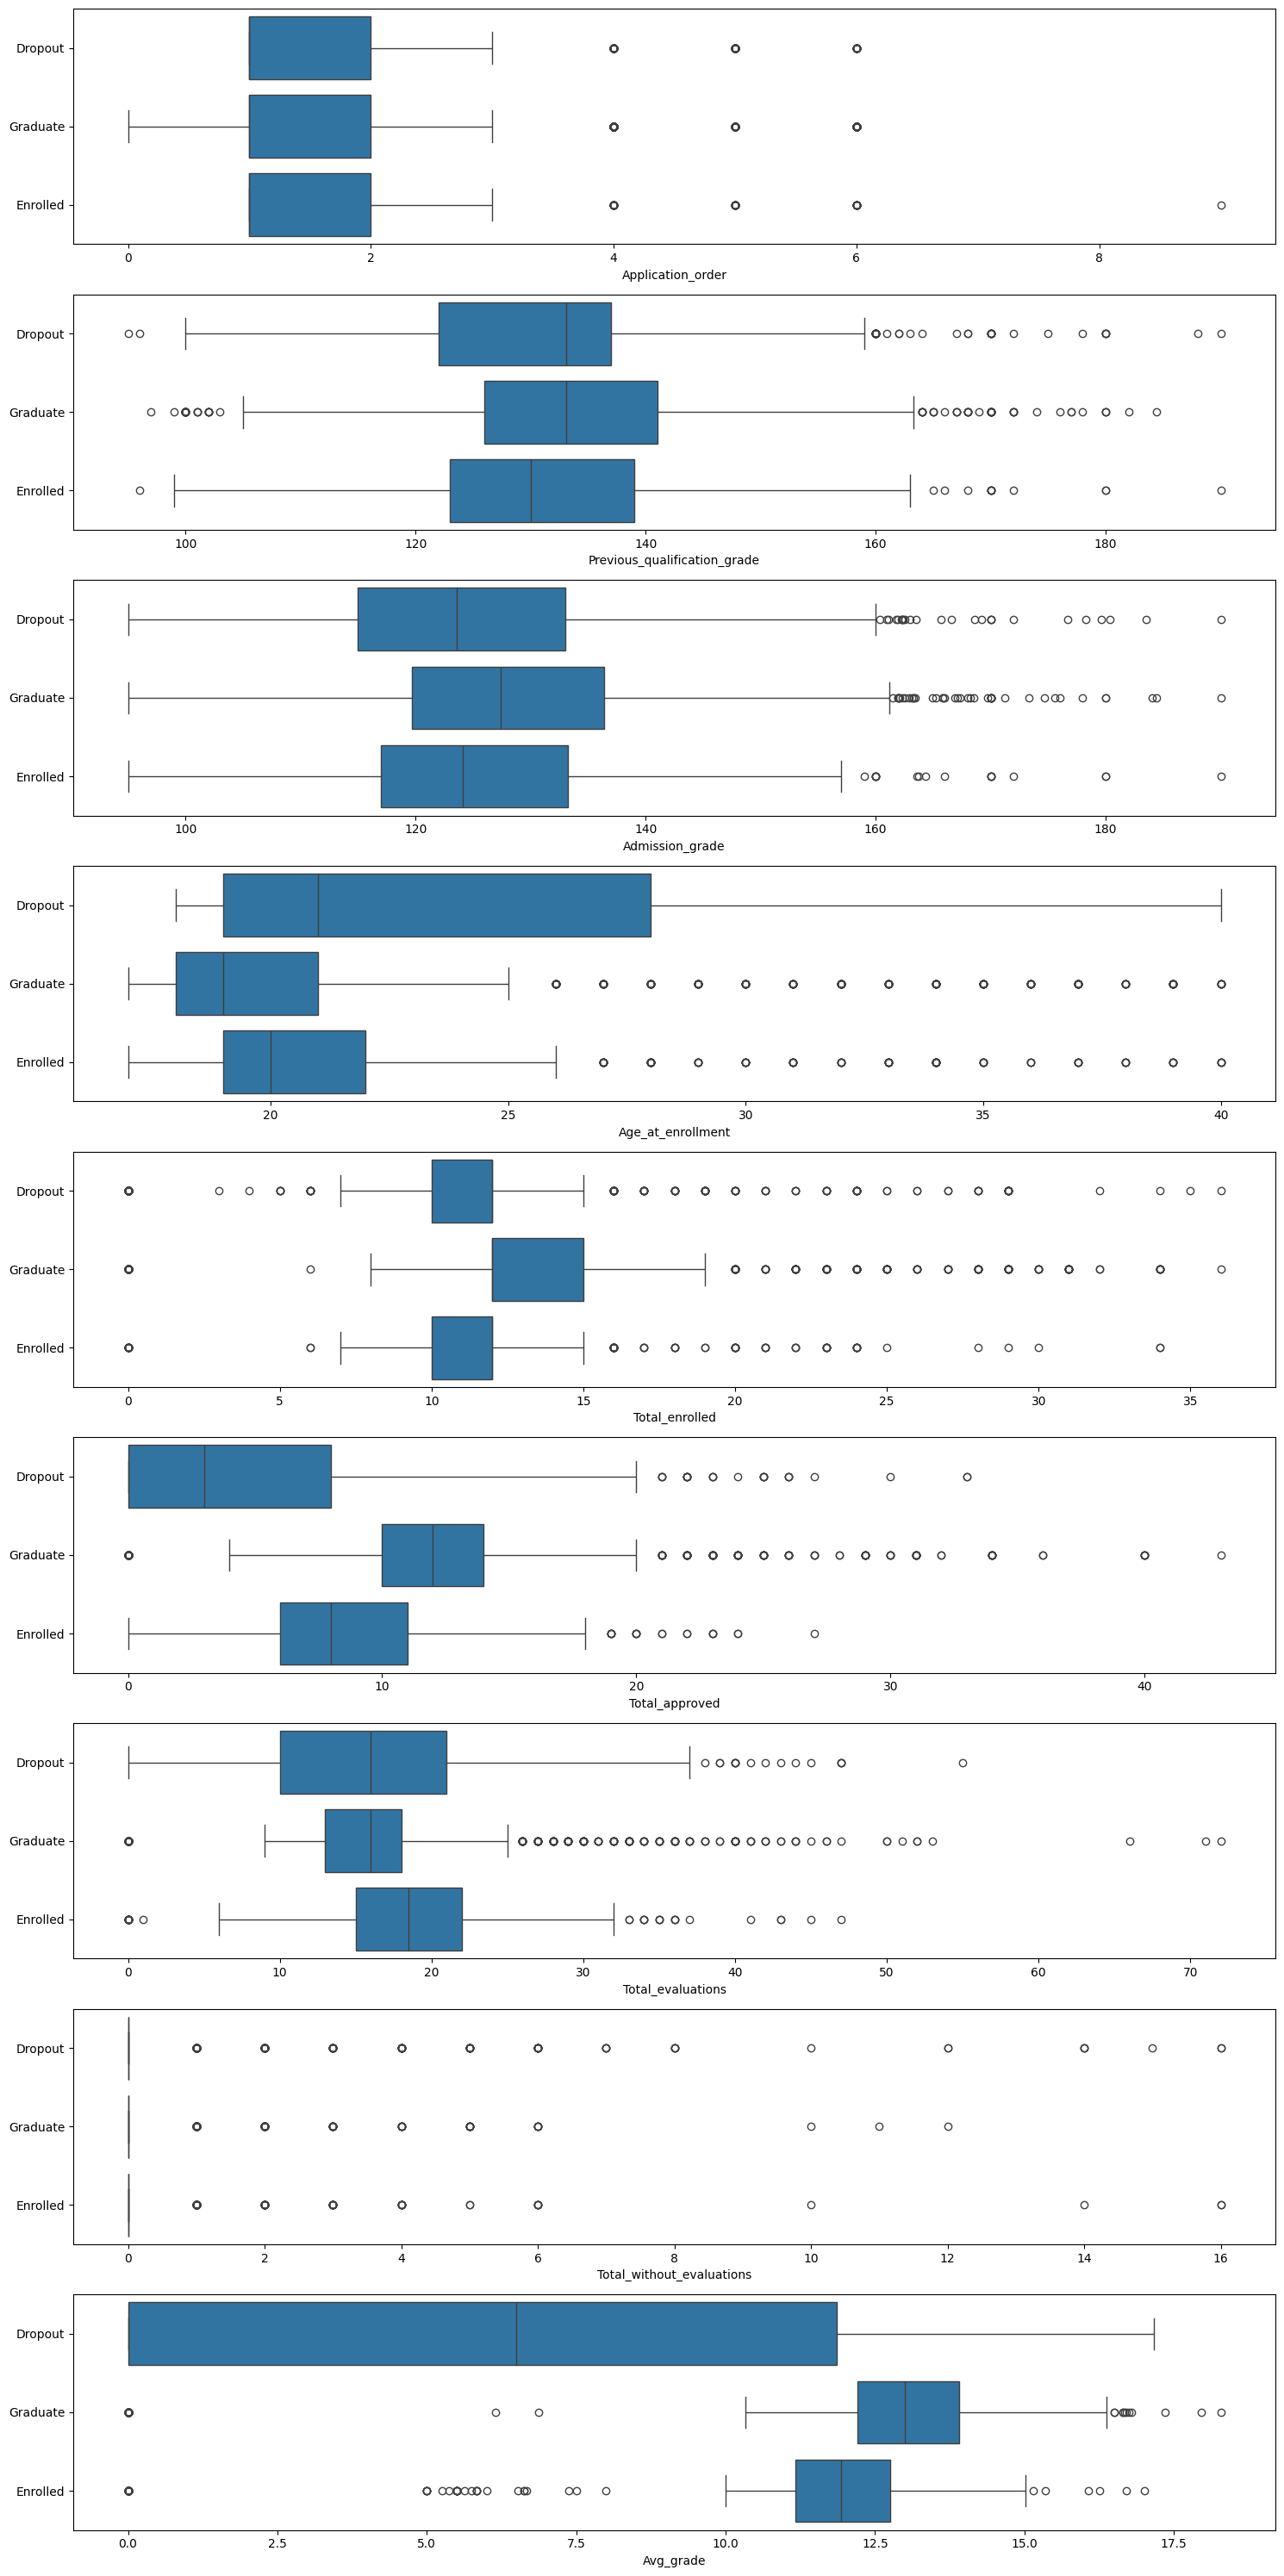

In [36]:
numerical_dis_plot(
    features=numerical_columns,
    df=cleaned_df,
    segment_feature="Status")

Pada visualisasi data di atas terlihat beberapa pola.

- Siswa yang memiliki grade Previous_qualification_grade, cenderung banyak yang lulus, ini juga sejalan dengan nilai kehadiran kelas (Admission_grade). Semakin sering siswa menghadiri kelas, semakin baik pula potensi kelulusannya dan semakin jauh juga dari potensi dropout.
- Siswa yang memiliki Total_enrolled atau kelas terdaftar yang banyak, juga semakin banyak yang lulus. Juga sejalan dengan Total_approved atau total sks yang lulus dan Avg_grade atau rata-rata nilai yang tinggi, cenderung semakin banyak yang lulus. Ini berarti siswa yang mendaftar banyak kelas, lulus di kelas-kelas tsb dan mendapat nilai yang baik, terhindar dari dropout
- Siswa yang Age_at_Enrollment nya di atas 25, cenderung banyak yang dropout dan yang memiliki Total_approved sedikit serta avg_grade nya rendah, juga banyak yang dropout. Ini berarti siswa yang usianya lebih matang akan rawan dropout. dan siswa yang memiliki kelas kelulusan sedikit serta nilai yang rendah juga cenderung terkna dropout

### Visualisasi distribusi kategorik dengan target label

#### Program studi teratas berdasarkan target label

Karena awalnya, Course memiliki kategorik angka acak bukan bentuk ordinal, maka perlu dilakukan mapping untuk melihat visualisasinya

In [37]:
cleaned_df['Course'] = cleaned_df['Course'].astype(int)

In [38]:
course_map = {
    33: "Biofuel Production Tech",
    171: "Animation & Multimedia",
    8014: "Social Service (Evening)",
    9003: "Agronomy",
    9070: "Communication Design",
    9085: "Veterinary Nursing",
    9119: "Informatics Engineering",
    9130: "Equinculture",
    9147: "Management",
    9238: "Social Service",
    9254: "Tourism",
    9500: "Nursing",
    9556: "Oral Hygiene",
    9670: "Advertising & Marketing",
    9773: "Journalism & Communication",
    9853: "Basic Education",
    9991: "Management (Evening)"
}

cleaned_df['Course_Name'] = cleaned_df['Course'].map(course_map)

Setelah mapping, dibuat fungsi yang hanya mengambil 15 kategori teratas program studi

In [39]:
def sorted_countplot(cleaned_df, col, target=None, top_n=15):
    top_values = cleaned_df[col].value_counts().nlargest(top_n).index
    df_top = cleaned_df[cleaned_df[col].isin(top_values)]

    plt.figure(figsize=(10, 6))
    if target:
        sns.countplot(data=df_top, y=col, hue=target, order=top_values)
        plt.legend(title=target, bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        sns.countplot(data=df_top, y=col, order=top_values)

    plt.title(f"Top {top_n} kategori teratas: {col}")
    plt.tight_layout()
    plt.show()

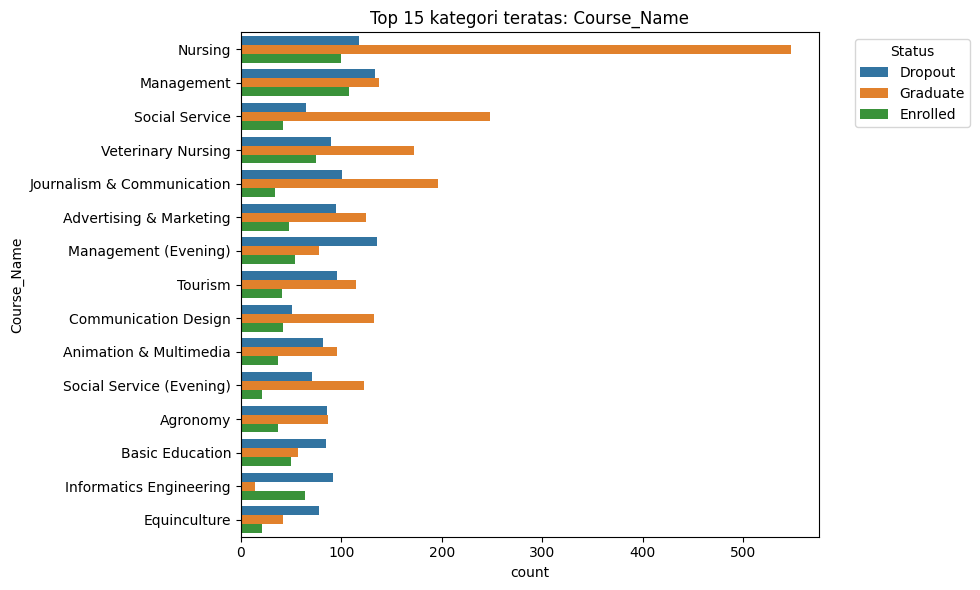

In [40]:
sorted_countplot(cleaned_df, 'Course_Name', target='Status', top_n=15)

Dari hasil, dapat dilihat jika Nursing memiliki banyak siswa yang berhasil graduate, begitu juga pada Social Servis dan Journalism. Ini berbeda dengan Management yang terlihat lebih banyak yang dropout daripada graduate, sama seperti Informatics Engeineering. Secara kseluruhan, datanya terlihat cukup acak dan bermacam-macam di program studi yang ada

#### Marital status teratas berdasarkan target label

Untuk melihat apakah status kawin pengaruh terhadap dropout, dilakukan visualisasi, dengan mapping dari nilai kategorikal yang ada

In [41]:
marital_status_map = {
    "1": "Single",
    "2": "Married",
    "4": "Divorced",
    "5": "Facto union",
    "Others": "Others"
}

cleaned_df['Marital_status_Label'] = cleaned_df['Marital_status'].map(marital_status_map)

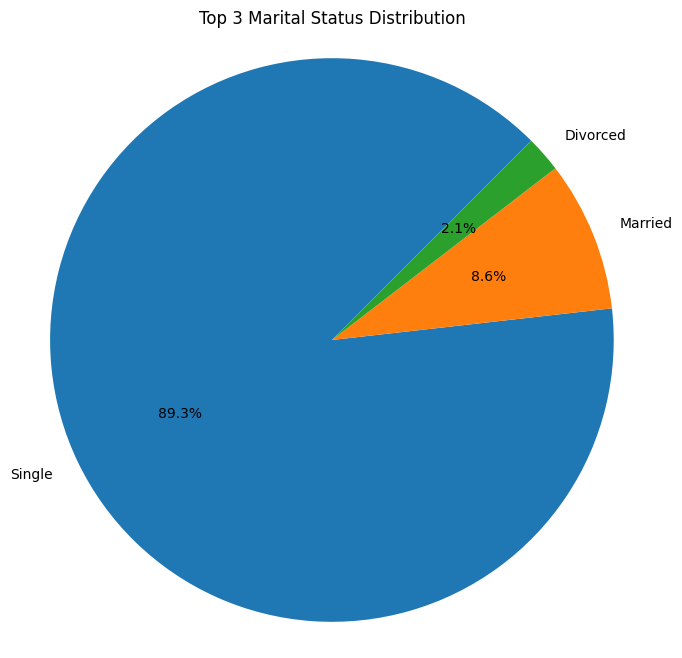

In [42]:
marital_status_counts = cleaned_df['Marital_status_Label'].value_counts().nlargest(3)

plt.figure(figsize=(8, 8))
plt.pie(
    marital_status_counts.values,
    labels=marital_status_counts.index,
    autopct='%1.1f%%',
    startangle=45
)
plt.title('Top 3 Marital Status Distribution')
plt.axis('equal')
plt.show()

Dapat dilihat, jika Single atau belum menikah mendominasi data sebesar 89.3%, sementara sisanya disusul married. Ini berarti rata-rata siswa belum banyak yang menikah

#### Kategorik lainnya berdasarkan target label

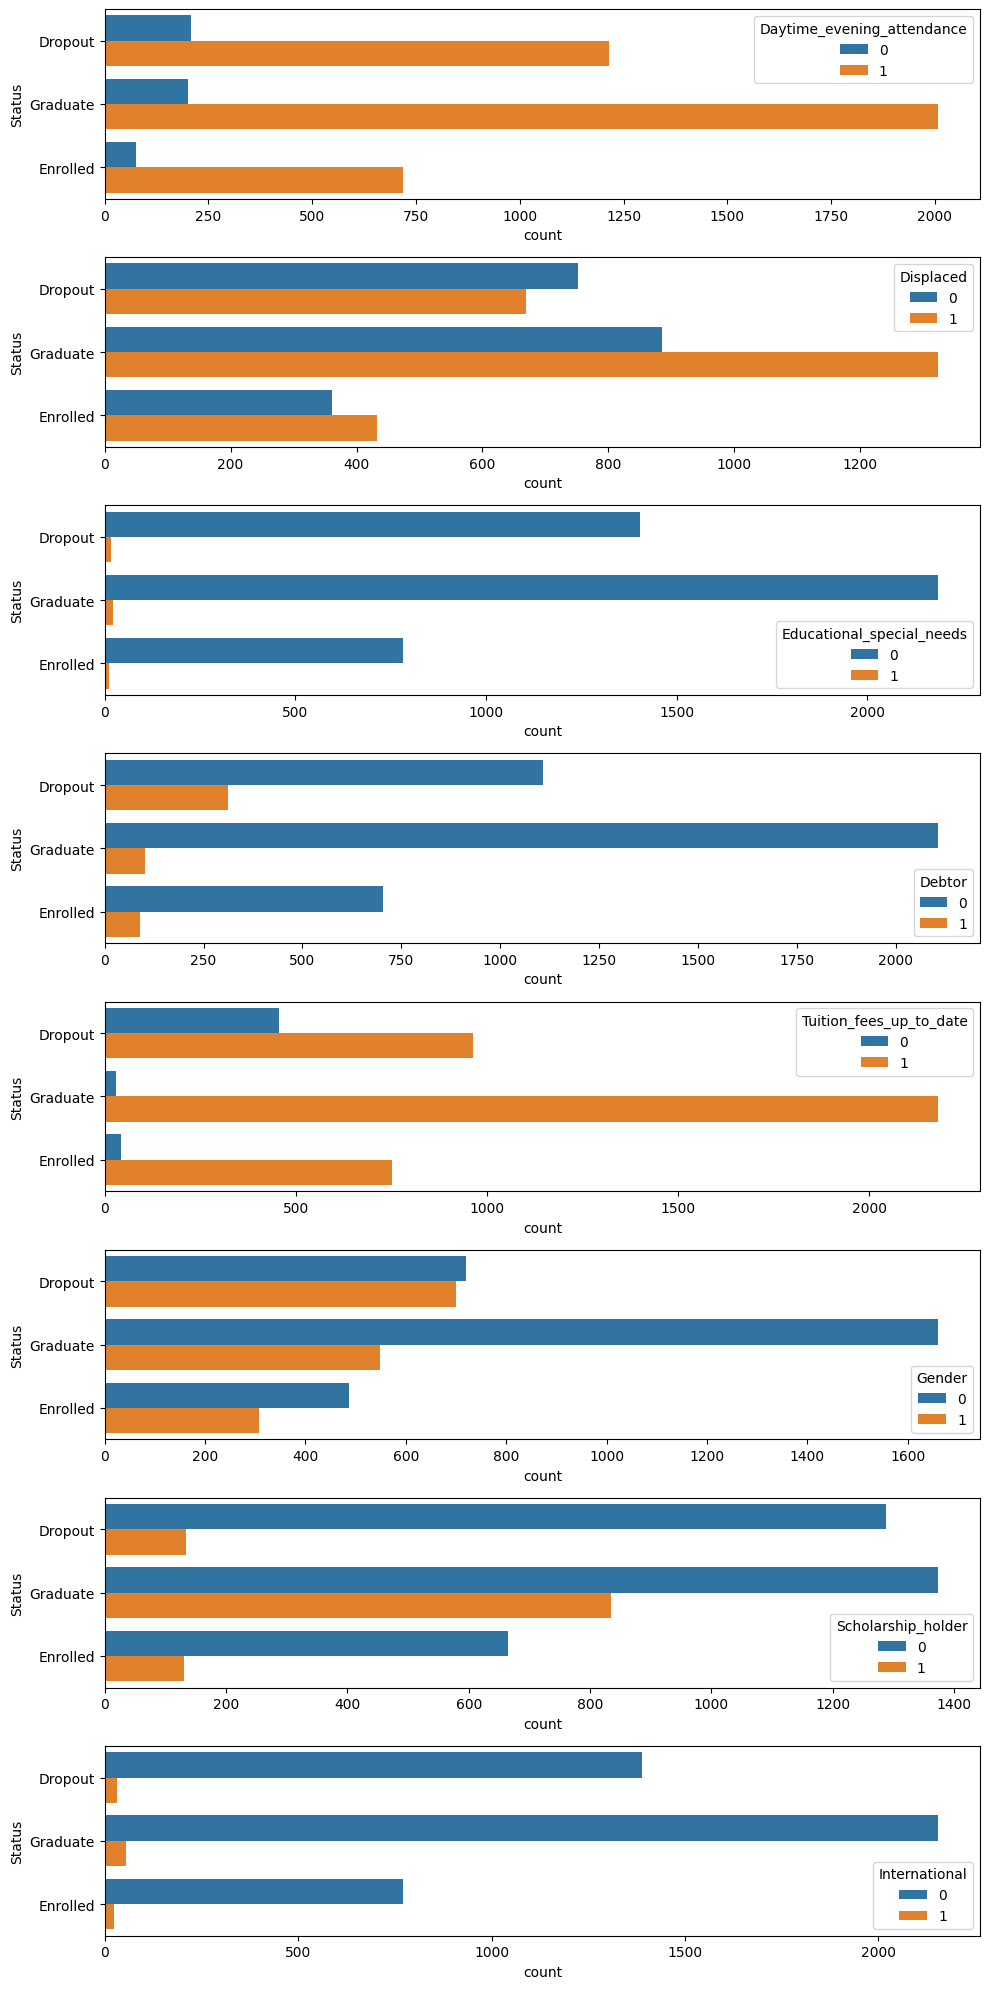

In [43]:
def categorical_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1,figsize=(10,20))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, y=segment_feature, hue=feature, ax=ax[i])
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
    plt.tight_layout()
    plt.show()

categorical_plot(
    features=[
        'Daytime_evening_attendance',
        'Displaced',
        'Educational_special_needs',
        'Debtor',
        'Tuition_fees_up_to_date',
        'Gender',
        'Scholarship_holder',
        'International'],
    df=cleaned_df,
    segment_feature="Status")

Pada visualisasi data di atas, terdapat beberapa pola menarik speerti.
        'Daytime_evening_attendance',
        'Displaced',
        'Educational_special_needs',
        'Debtor',
        'Tuition_fees_up_to_date',
        'Gender',
        'Scholarship_holder',
        'International'],

- Siswa yang Graduate cenderung Daytime_evening_attendance hadir pada kelas siang hari, siswa yang mengungsi (displaced), Tuition_fees_up_to_date artinya masih mendapat biaya terkini dan  dan pemegang beasiswa (Scolarship_holder)
- Siswa yang Dropout cenderung Daytime_evening_attendance hadir pada kelas siang hari, bukan siswa yang mengungsi (displaced), Tuition_fees_up_to_date masih banyak yang 0 artinya masih banyak yang tidak mendapat biaya terkini tetapi masih pemegang beasiswa (Scolarship_holder)

Di sisi lain, hasil visualisasi dari feature Gender, Debtor, Educational_special_needs dan INternational tidak terdapat pola yang menarik.

### Visualisasi hubungan variabel numerik

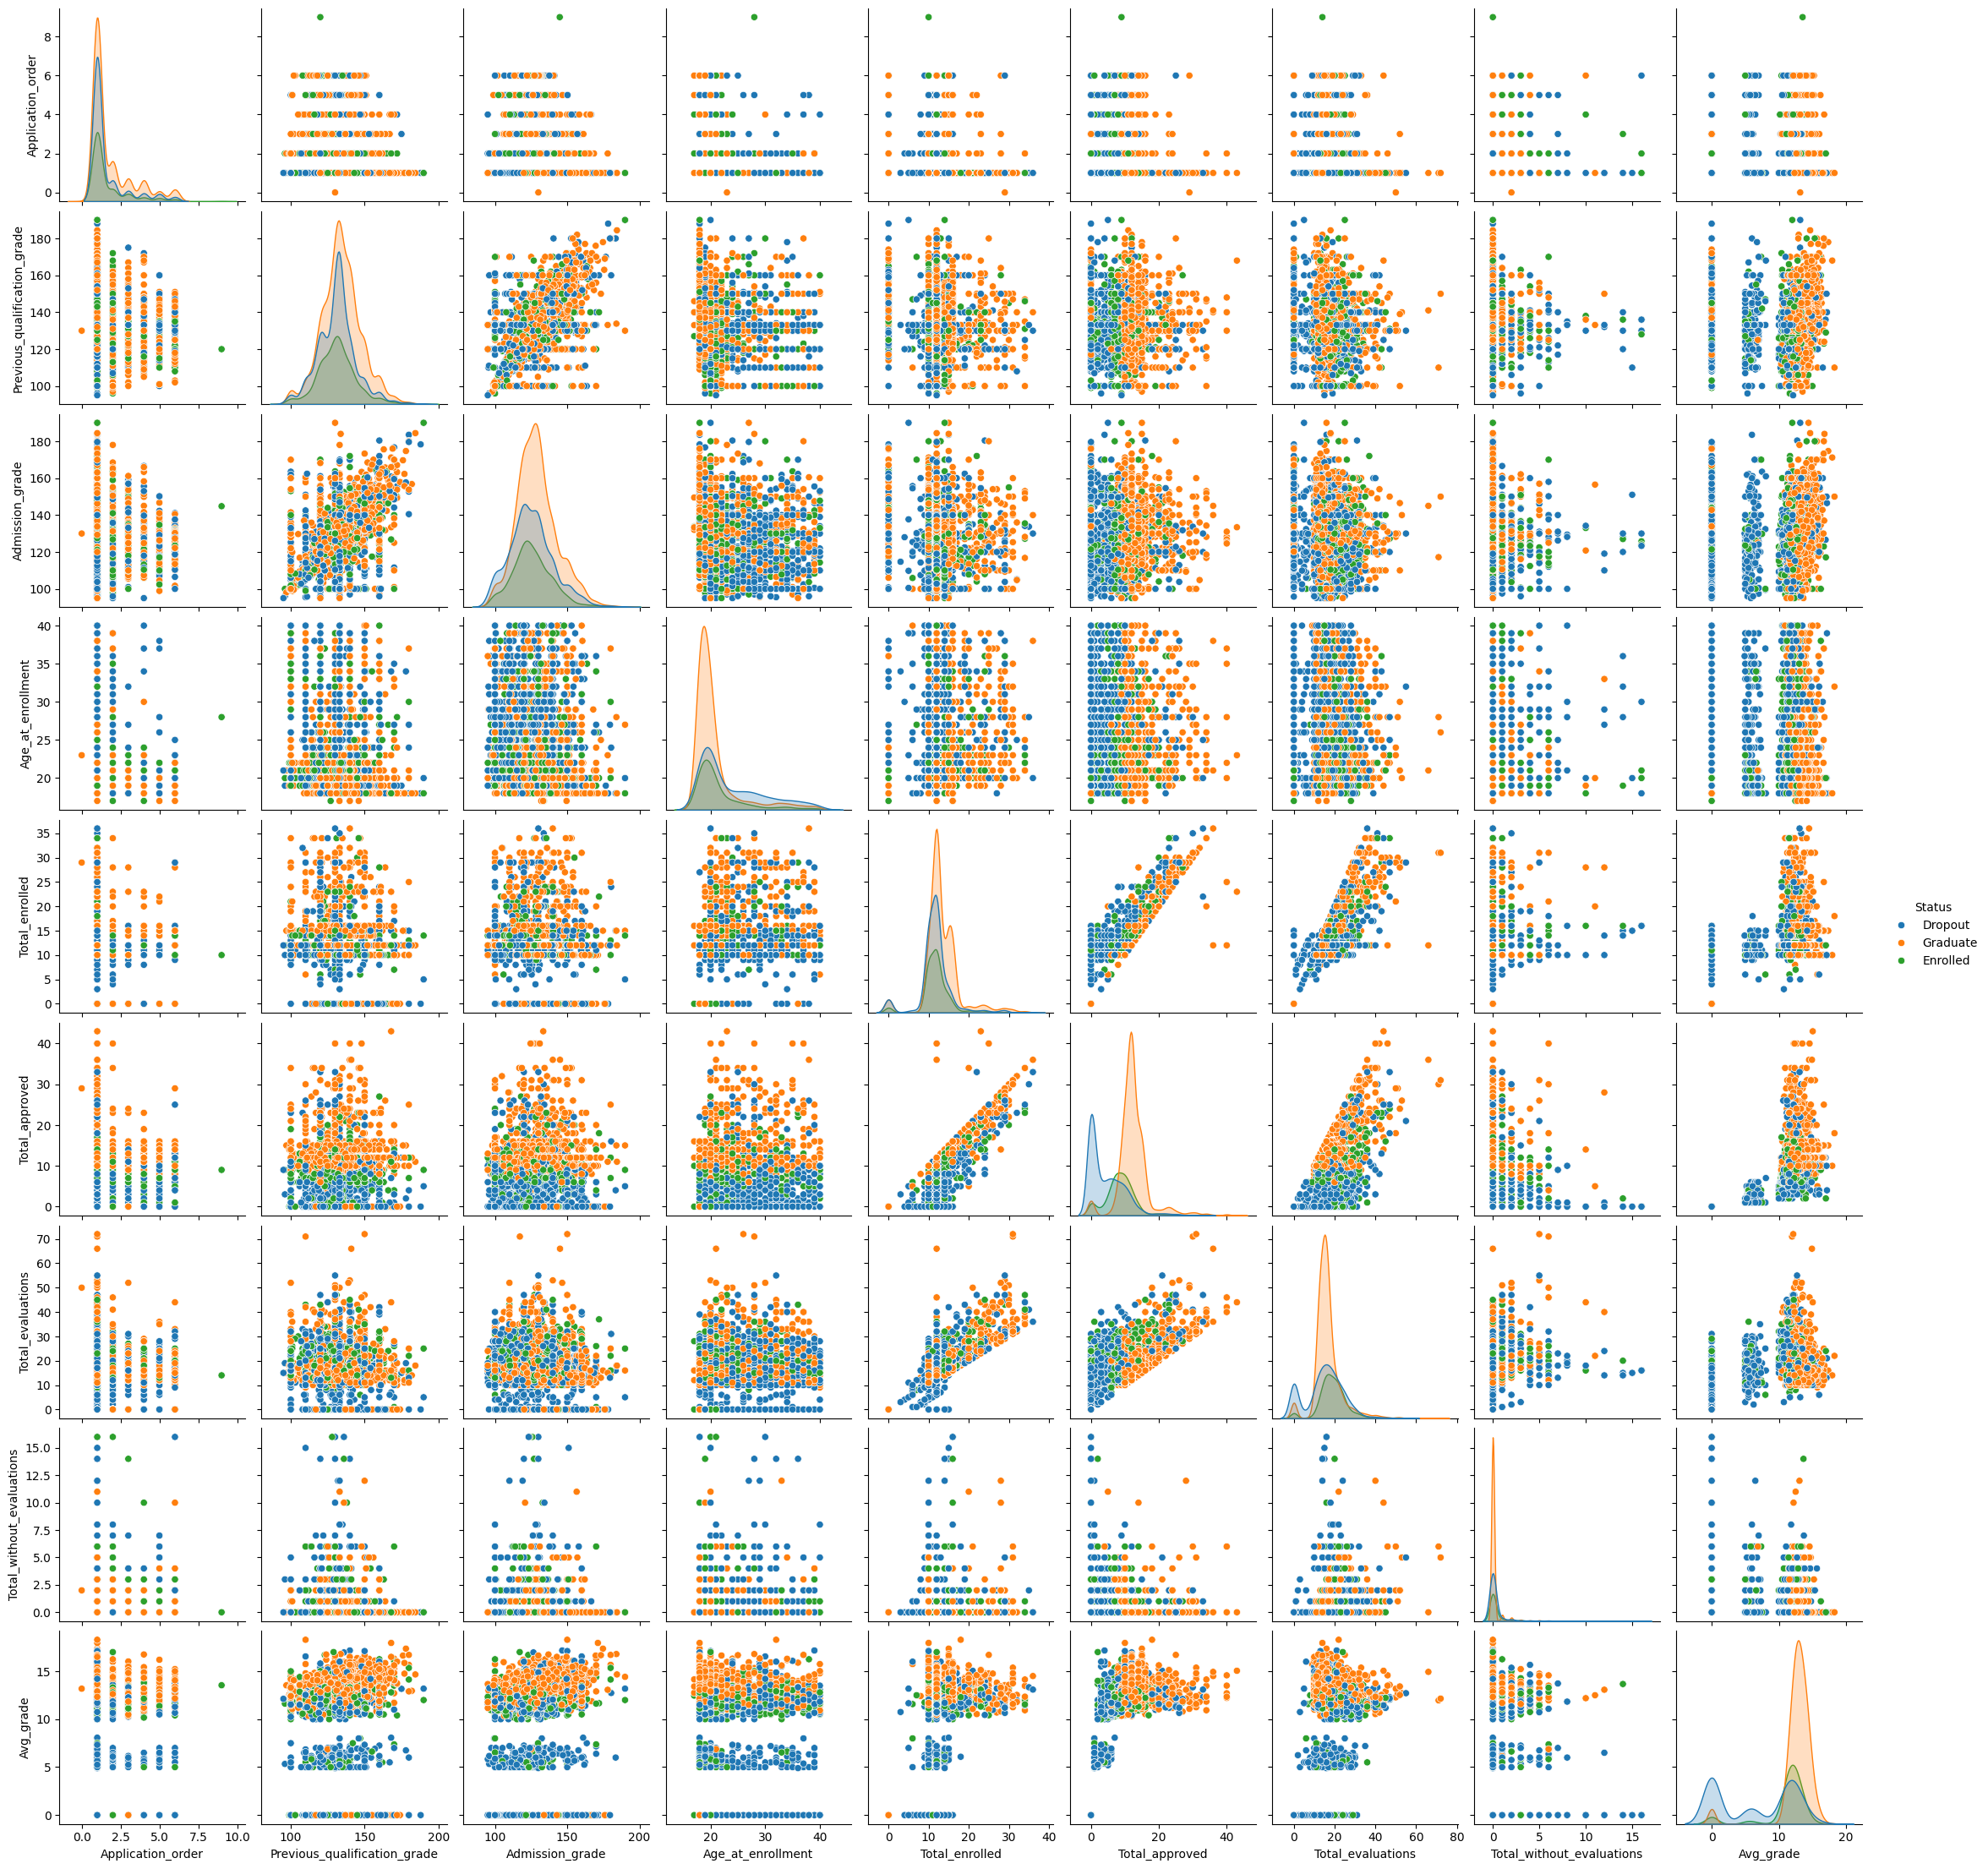

In [44]:
sns.pairplot(cleaned_df, hue='Status', vars=cleaned_df[numerical_columns])

Dari hubungan scatter plot di atas, tidak banyak pola menarik yang ada, tetapi beberapa data terlihat memiliki pola hubungan yang tinggi dengan adanya garis linear yang terbentuk, seperti Total_approved dan Total_enrolled.

### Heatmap korelasi variabel numerik

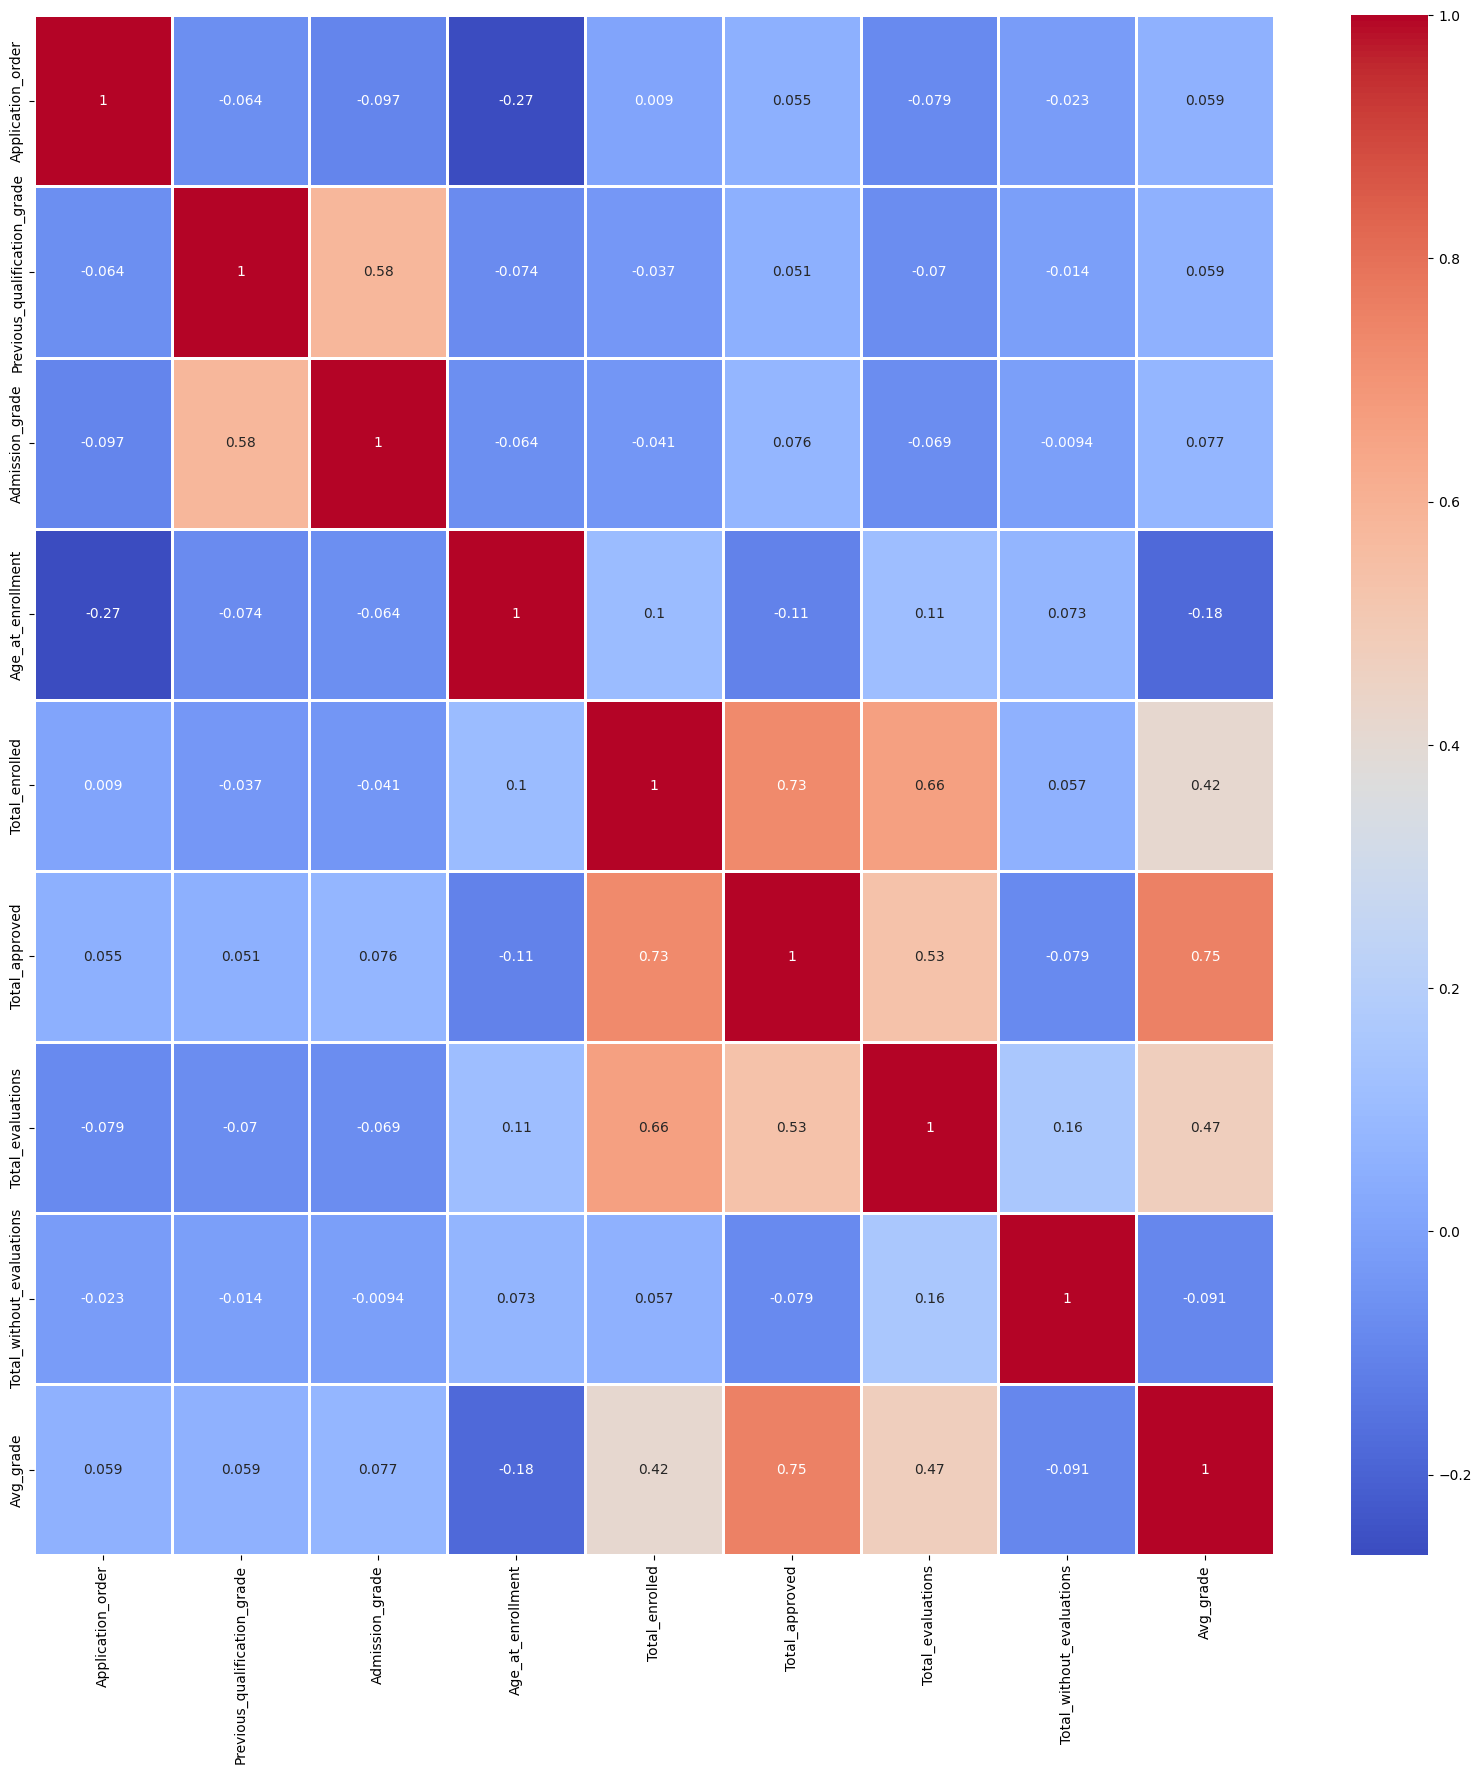

In [45]:
plt.figure(figsize=(20,20))
sns.heatmap(cleaned_df[numerical_columns].corr(), annot=True, cmap='coolwarm', linewidth=1)
plt.show()

Pada visualisasi data di atas, terlihat beberapa fitur yang saling berkorelasi secara positif maupun negatif. Hal ini menandakan adanya multikolinearitas pada dataset yang dimiliki. Namun, dari hasil di atas, data seperti Total_enrolled dan Total_approved memiliki korelais yang cukup baik yaitu 75%

# Data Preprocessing

## Train-test Split

Sebelum membagi data, berdasarkan hasil-hasil analisis sebelumnya, beberapa fitur yang tidak begitu memiliki pola yang berkontribusi secara banyak, akan dihapus. Seperti berikut ini


In [46]:
new_cleaned_df = cleaned_df.drop(columns=['Marital_status', 'Application_mode', 'Previous_qualification',
                                          'Nacionality', 'Mothers_qualification', 'Fathers_qualification',
                                          'Mothers_occupation', 'Fathers_occupation', 'Debtor', 'Gender',
                                          'International','Course', 'Course_Name', 'Marital_status_Label', 'Displaced'], axis=1)
new_cleaned_df

Application_order  Daytime_evening_attendance  \
0                     5                           1   
1                     1                           1   
2                     5                           1   
3                     2                           1   
4                     1                           0   
...                 ...                         ...   
4419                  6                           1   
4420                  2                           1   
4421                  1                           1   
4422                  1                           1   
4423                  1                           1   

      Previous_qualification_grade  Admission_grade  \
0                            122.0            127.3   
1                            160.0            142.5   
2                            122.0            124.8   
3                            122.0            119.6   
4                            100.0            141.5   
...                            ...              ...   
4419                         125.0            122.2   
4420                         120.0            119.0   
4421                         154.0            149.5   
4422                         180.0            153.8   
4423                         152.0            152.0   

      Educational_special_needs  Tuition_fees_up_to_date  Scholarship_holder  \
0                             0                        1                   0   
1                             0                        0                   0   
2                             0                        0                   0   
3                             0                        1                   0   
4                             0                        1                   0   
...                         ...                      ...                 ...   
4419                          0                        1                   0   
4420                          0                        0                   0   
4421                          0                        1                   1   
4422                          0                        1                   1   
4423                          0                        1                   0   

      Age_at_enrollment    Status  Total_enrolled  Total_approved  \
0                  20.0   Dropout             0.0               0   
1                  19.0  Graduate            12.0              12   
2                  19.0   Dropout            12.0               0   
3                  20.0  Graduate            12.0              11   
4                  20.0  Graduate            12.0              11   
...                 ...       ...             ...             ...   
4419               19.0  Graduate            12.0              10   
4420               18.0   Dropout            12.0               8   
4421               30.0   Dropout            15.0               8   
4422               20.0  Graduate            10.0              10   
4423               22.0  Graduate            12.0              12   

      Total_evaluations  Total_without_evaluations  Avg_grade  
0                     0                        0.0   0.000000  
1                    12                        0.0  13.833333  
2                     0                        0.0   0.000000  
3                    18                        0.0  12.914286  
4                    15                        0.0  12.666667  
...                 ...                        ...        ...  
4419                 15                        0.0  13.133333  
4420                 12                        0.0  11.500000  
4421                 17                        0.0  14.206250  
4422                 11                        0.0  12.900000  
4423                 14                        0.0  12.333333  

[4424 rows x 14 columns]

In [47]:
new_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Application_order             4424 non-null   int64  
 1   Daytime_evening_attendance    4424 non-null   int64  
 2   Previous_qualification_grade  4424 non-null   float64
 3   Admission_grade               4424 non-null   float64
 4   Educational_special_needs     4424 non-null   int64  
 5   Tuition_fees_up_to_date       4424 non-null   int64  
 6   Scholarship_holder            4424 non-null   int64  
 7   Age_at_enrollment             4424 non-null   float64
 8   Status                        4424 non-null   object 
 9   Total_enrolled                4424 non-null   float64
 10  Total_approved                4424 non-null   int64  
 11  Total_evaluations             4424 non-null   int64  
 12  Total_without_evaluations     4424 non-null   float64
 13  Avg

Kode di bawah akan membagi new_cleaned_df menjadi dua bagian (train_df dan test_df) dengan proporsi 80:20. Proses pembagian ini dilakukan secara acak (shuffle=True) untuk memastikan semua keadaan yang terdapat dalam dataset dapat terwakilkan dengan baik.

In [48]:
train_df, test_df = train_test_split(new_cleaned_df, test_size=0.2, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print(train_df.shape)
print(test_df.shape)

(3539, 14)
(885, 14)


## Encoding dan Scaled

Encoding merupakan proses untuk membuat sebuah indeks dalam bentuk bilangan bulat yang mewakili kategori tertentu dalam sebuah feature kategorik, untuk pemodelan lebih lanjut.

Selain melakukan encoding terhadap feature kategorik, perlu dilakukan scaling pada feature numerik. Scaling merupakan proses pengubahan skala pada data numerik. Proses ini dilakukan agar seluruh feature numerik memiliki skala yang terstandarisasi, untuk meningkatkan proses proses pelatihan model nantinya.

Sebelum melakukan encoding dan scaling, perlu memisahkan antara feature training (X) dan target (Y).

In [49]:
X_train = train_df.drop(columns="Status", axis=1)
y_train = train_df["Status"]

X_test = test_df.drop(columns="Status", axis=1)
y_test = test_df["Status"]

In [50]:
os.makedirs("model", exist_ok=True)

In [51]:
def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))

            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
        return df

def encoding(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))

            df_test["{}".format(feature)] = encoder.transform(df_test[feature])
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))
        return df

Function scaling() digunakan untuk melakukan proses scaling dengan metode Min-max scaling (memanfaatkan MinMaxScaler() dari scikit learn), yang merupakan metode scaling menggunakan nilai minimum dan maksimum yang terdapat dalam sebuah feature dan mengubah data dalam feature tersebut ke dalam skala 0-1. Function ini juga akan menyimpan object yang digunakan untuk melakukan proses scaling pada setiap feature dalam sebuah berkas dengan format .joblib.

Pada function encoding(), dilakukan proses encoding pada seluruh feature kategorik dengan bantuan LabelEncoder() dari scikit learn.

In [52]:
new_cleaned_df

Application_order  Daytime_evening_attendance  \
0                     5                           1   
1                     1                           1   
2                     5                           1   
3                     2                           1   
4                     1                           0   
...                 ...                         ...   
4419                  6                           1   
4420                  2                           1   
4421                  1                           1   
4422                  1                           1   
4423                  1                           1   

      Previous_qualification_grade  Admission_grade  \
0                            122.0            127.3   
1                            160.0            142.5   
2                            122.0            124.8   
3                            122.0            119.6   
4                            100.0            141.5   
...                            ...              ...   
4419                         125.0            122.2   
4420                         120.0            119.0   
4421                         154.0            149.5   
4422                         180.0            153.8   
4423                         152.0            152.0   

      Educational_special_needs  Tuition_fees_up_to_date  Scholarship_holder  \
0                             0                        1                   0   
1                             0                        0                   0   
2                             0                        0                   0   
3                             0                        1                   0   
4                             0                        1                   0   
...                         ...                      ...                 ...   
4419                          0                        1                   0   
4420                          0                        0                   0   
4421                          0                        1                   1   
4422                          0                        1                   1   
4423                          0                        1                   0   

      Age_at_enrollment    Status  Total_enrolled  Total_approved  \
0                  20.0   Dropout             0.0               0   
1                  19.0  Graduate            12.0              12   
2                  19.0   Dropout            12.0               0   
3                  20.0  Graduate            12.0              11   
4                  20.0  Graduate            12.0              11   
...                 ...       ...             ...             ...   
4419               19.0  Graduate            12.0              10   
4420               18.0   Dropout            12.0               8   
4421               30.0   Dropout            15.0               8   
4422               20.0  Graduate            10.0              10   
4423               22.0  Graduate            12.0              12   

      Total_evaluations  Total_without_evaluations  Avg_grade  
0                     0                        0.0   0.000000  
1                    12                        0.0  13.833333  
2                     0                        0.0   0.000000  
3                    18                        0.0  12.914286  
4                    15                        0.0  12.666667  
...                 ...                        ...        ...  
4419                 15                        0.0  13.133333  
4420                 12                        0.0  11.500000  
4421                 17                        0.0  14.206250  
4422                 11                        0.0  12.900000  
4423                 14                        0.0  12.333333  

[4424 rows x 14 columns]

In [53]:
numerical_columns = [
    'Application_order',
    'Total_evaluations',
    'Total_without_evaluations',
    'Previous_qualification_grade',
    'Admission_grade',
    'Age_at_enrollment',
    'Total_enrolled',
    'Total_approved',
    'Avg_grade'
]

categorical_columns = [
    'Daytime_evening_attendance',
    'Educational_special_needs',
    'Tuition_fees_up_to_date',
    'Scholarship_holder',
]

new_train_df, new_test_df = scaling(numerical_columns, X_train, X_test)
new_train_df, new_test_df = encoding(categorical_columns, new_train_df, new_test_df)

In [54]:
new_train_df.head()

Application_order  Daytime_evening_attendance  \
0           0.111111                           1   
1           0.111111                           1   
2           0.666667                           1   
3           0.111111                           1   
4           0.333333                           1   

   Previous_qualification_grade  Admission_grade  Educational_special_needs  \
0                      0.368421         0.368421                          0   
1                      0.368421         0.157895                          0   
2                      0.252632         0.296842                          0   
3                      0.401053         0.089474                          0   
4                      0.494737         0.445263                          0   

   Tuition_fees_up_to_date  Scholarship_holder  Age_at_enrollment  \
0                        1                   0           0.782609   
1                        1                   1           0.347826   
2                        1                   0           0.217391   
3                        1                   0           0.130435   
4                        1                   1           0.217391   

   Total_enrolled  Total_approved  Total_evaluations  \
0        0.277778        0.000000           0.138889   
1        0.333333        0.116279           0.375000   
2        0.333333        0.279070           0.194444   
3        0.333333        0.000000           0.000000   
4        0.388889        0.279070           0.194444   

   Total_without_evaluations  Avg_grade  
0                        0.0   0.000000  
1                        0.0   0.628977  
2                        0.0   0.760014  
3                        0.0   0.000000  
4                        0.0   0.760242

In [55]:
new_test_df.head()

Application_order  Daytime_evening_attendance  \
0           0.111111                           1   
1           0.111111                           1   
2           0.111111                           1   
3           0.222222                           1   
4           0.111111                           1   

   Previous_qualification_grade  Admission_grade  Educational_special_needs  \
0                      0.401053         0.157895                          0   
1                      0.315789         0.261053                          0   
2                      0.400000         0.341053                          0   
3                      0.157895         0.213684                          0   
4                      0.368421         0.117895                          0   

   Tuition_fees_up_to_date  Scholarship_holder  Age_at_enrollment  \
0                        1                   1           0.565217   
1                        1                   0           0.043478   
2                        1                   1           0.043478   
3                        1                   0           0.086957   
4                        1                   0           0.434783   

   Total_enrolled  Total_approved  Total_evaluations  \
0        0.333333        0.023256           0.319444   
1        0.333333        0.255814           0.236111   
2        0.388889        0.325581           0.194444   
3        0.333333        0.255814           0.222222   
4        0.388889        0.000000           0.388889   

   Total_without_evaluations  Avg_grade  
0                        0.0   0.273468  
1                        0.0   0.648511  
2                        0.0   0.683671  
3                        0.0   0.734458  
4                        0.0   0.000000

Pembagian berhasil dibuat dengan nilai yang sudah terstandarisasi. Selanjutnya, dilakukan juga encoder terhadap data kategorik

In [56]:
encoder = LabelEncoder()
encoder.fit(y_train)
new_y_train = encoder.transform(y_train)
joblib.dump(encoder, "model/encoder_target.joblib")

new_y_test = encoder.transform(y_test)

In [57]:
new_y_train

array([0, 1, 2, ..., 2, 2, 0])

In [58]:
new_y_test

array([0, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0, 1, 1, 2, 1, 2, 2, 0,
       0, 2, 2, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 1, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 1, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0, 2, 0, 2, 1, 2, 2,
       2, 2, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1,
       0, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 2, 0, 2, 1,
       1, 1, 2, 2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 2, 1, 2, 0, 1, 1, 0, 2, 1,
       0, 0, 2, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 0, 2,
       1, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 1,
       2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 0, 2, 2, 2, 2, 0,
       0, 1, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 0, 0, 1, 0, 1, 0, 2, 2, 2, 1, 2, 1, 2, 2,

## Principal Component Analysis (PCA)

Principal Component Analysis atau PCA adalah teknik untuk mereduksi dimensi, mengekstraksi fitur, dan mentransformasi data dari “n-dimensional space” ke dalam sistem berkoordinat baru dengan dimensi m, di mana m lebih kecil dari n.

Teknik PCA ini, umumnya digunakan untuk mereduksi feature asli menjadi sejumlah kecil feature baru yang tidak berkorelasi linier. Feature baru tersebut disebut komponen utama (PC). Komponen utama ini dapat menangkap sebagian besar varians (berkorelasi dengan informasi) dalam feature asli sehingga saat teknik PCA diterapkan pada suatu data, ia hanya akan menggunakan komponen utama untuk merepresentasikan data asli.

Pada visualisasi data heatmap korelasi, terdapat beberapa fitur yang memiliki korelasi positif dan negatif, fitur yang memiliki korelasi cukup tinggi akan masuk ke PCA 1 sementara yang tidak begitu berkorelasi masuk ke PCA 2

In [59]:
pca_numerical_columns_1 = [
    'Total_enrolled',
    'Total_approved',
    'Avg_grade',
    'Total_evaluations',
]

pca_numerical_columns_2 = [
    'Previous_qualification_grade',
    'Admission_grade',
    'Age_at_enrollment',
    'Application_order',
    'Total_without_evaluations'
]

Setelah mengelompokkan feature yang saling berkorelasi, perlu menyiapkan sebuah dataframe baru yang nantinya akan menampung hasil dari proses PCA.

In [60]:
train_pca_df = new_train_df.copy().reset_index(drop=True)
test_pca_df = new_test_df.copy().reset_index(drop=True)

DIlakukan pencarian jumlah komponen utama lebih dulu pada PCA 1. Pada kode di bawah, dilakukan PCA dengan menggunakan seluruh komponen utama yang bisa terjadi (sesuai dengan jumlah feature asli).

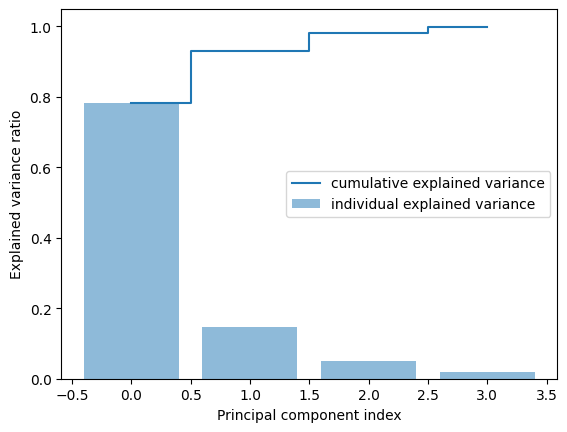

In [61]:
pca = PCA(n_components=len(pca_numerical_columns_1), random_state=123)
pca.fit(train_pca_df[pca_numerical_columns_1])
princ_comp = pca.transform(train_pca_df[pca_numerical_columns_1])

var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(pca_numerical_columns_1)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_numerical_columns_1)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

Gambar di atas menunjukkan visualisasi jumlah varians untuk setiap jumlah komponen utama. Berdasarkan gambar tersebut terlihat bahwa, dengan hanya mengambil 2 komponen utama telah diperoleh lebih dari 80% varians. Ini berarti dari 4 fitur, nilai dapat terwakili oleh hanya 2 fitur. Selanjutnya, proses PCA dilakukan dengan dua komponen utama tadi lalu mengganti kelompok feature asli dengan 2 komponen utama dari proses PCA.

In [62]:
pca_1 = PCA(n_components=2, random_state=123)
pca_1.fit(train_pca_df[pca_numerical_columns_1])
joblib.dump(pca_1, "model/pca_{}.joblib".format(1))
princ_comp_1 = pca_1.transform(train_pca_df[pca_numerical_columns_1])
train_pca_df[["pc1_1", "pc1_2"]] = pd.DataFrame(princ_comp_1, columns=["pc1_1", "pc1_2"])
train_pca_df.drop(columns=pca_numerical_columns_1, axis=1, inplace=True)
train_pca_df.head()

Application_order  Daytime_evening_attendance  \
0           0.111111                           1   
1           0.111111                           1   
2           0.666667                           1   
3           0.111111                           1   
4           0.333333                           1   

   Previous_qualification_grade  Admission_grade  Educational_special_needs  \
0                      0.368421         0.368421                          0   
1                      0.368421         0.157895                          0   
2                      0.252632         0.296842                          0   
3                      0.401053         0.089474                          0   
4                      0.494737         0.445263                          0   

   Tuition_fees_up_to_date  Scholarship_holder  Age_at_enrollment  \
0                        1                   0           0.782609   
1                        1                   1           0.347826   
2                        1                   0           0.217391   
3                        1                   0           0.130435   
4                        1                   1           0.217391   

   Total_without_evaluations     pc1_1     pc1_2  
0                        0.0 -0.607328  0.114826  
1                        0.0  0.041421 -0.000083  
2                        0.0  0.179376 -0.088207  
3                        0.0 -0.623197  0.094177  
4                        0.0  0.193671 -0.049009

Kode menyimpan object PCA ini dalam berkas pca_1.joblib.

Selanjunya, dilakukan pencarian jumlah komponen utama pada PCA 2. Pada kode di bawah, dilakukan PCA dengan menggunakan seluruh komponen utama yang bisa terjadi (sesuai dengan jumlah feature asli).

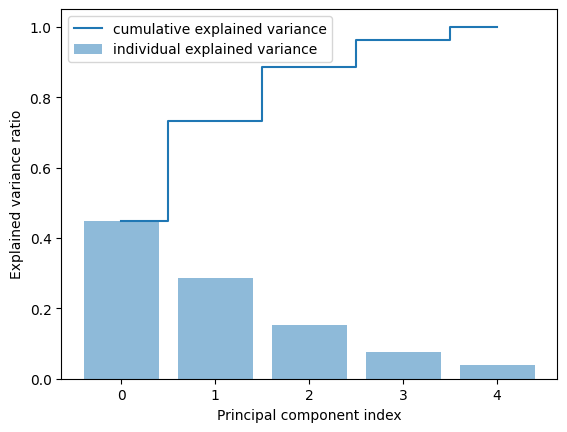

In [63]:
pca = PCA(n_components=len(pca_numerical_columns_2), random_state=123)
pca.fit(train_pca_df[pca_numerical_columns_2])
princ_comp = pca.transform(train_pca_df[pca_numerical_columns_2])

var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(pca_numerical_columns_2)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_numerical_columns_2)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

Berdasarkan grafik tersebut terlihat bahwa hanya dengan menggunakan 3 komponen utama telah memperoleh 90% varians. Hal ini berarti komponen utama dapat mewakili sebagian besar informasi dari seluruh feature pada kelompok ini (ada 5 feature) dan hanya menggunakan 3 komponen utama.

Kemudian dilakukan proses PCA kembali dengan jumlah komponen utama sebanyak 3. Lalu, mengganti kelompok feature tersebut dengan 3 komponen utama dari proses PCA

In [64]:
pca_2 = PCA(n_components=3, random_state=123)
pca_2.fit(train_pca_df[pca_numerical_columns_2])
joblib.dump(pca_2, "model/pca_{}.joblib".format(2))
princ_comp_2 = pca_2.transform(train_pca_df[pca_numerical_columns_2])
train_pca_df[["pc2_1", "pc2_2", "pc2_3"]] = pd.DataFrame(princ_comp_2, columns=["pc2_1", "pc2_2", "pc2_3"])
train_pca_df.drop(columns=pca_numerical_columns_2, axis=1, inplace=True)
train_pca_df.head()

Daytime_evening_attendance  Educational_special_needs  \
0                           1                          0   
1                           1                          0   
2                           1                          0   
3                           1                          0   
4                           1                          0   

   Tuition_fees_up_to_date  Scholarship_holder     pc1_1     pc1_2     pc2_1  \
0                        1                   0 -0.607328  0.114826  0.562953   
1                        1                   1  0.041421 -0.000083  0.169922   
2                        1                   0  0.179376 -0.088207 -0.098852   
3                        1                   0 -0.623197  0.094177 -0.033823   
4                        1                   1  0.193671 -0.049009 -0.054586   

      pc2_2     pc2_3  
0  0.074576  0.083383  
1 -0.117159 -0.068493  
2 -0.232746  0.416279  
3 -0.165468 -0.134057  
4  0.108805  0.163549

Sekarang data hanya memiliki 5 feature (awalnya terdapat 9 feature) yang akan digunakan untuk melatih model machine learning. Tidak lupa, dilakukan penggabungan pada kedua reduksi PCA 1 dan PCA 2.

In [65]:
test_princ_comp_1 = pca_1.transform(test_pca_df[pca_numerical_columns_1])
test_pca_df[["pc1_1", "pc1_2"]] = pd.DataFrame(test_princ_comp_1, columns=["pc1_1", "pc1_2"])
test_pca_df.drop(columns=pca_numerical_columns_1, axis=1, inplace=True)

test_princ_comp_2 = pca_2.transform(test_pca_df[pca_numerical_columns_2])
test_pca_df[["pc2_1", "pc2_2", "pc2_3"]] = pd.DataFrame(test_princ_comp_2, columns=["pc2_1", "pc2_2", "pc2_3"])
test_pca_df.drop(columns=pca_numerical_columns_2, axis=1, inplace=True)
test_pca_df.head()

Daytime_evening_attendance  Educational_special_needs  \
0                           1                          0   
1                           1                          0   
2                           1                          0   
3                           1                          0   
4                           1                          0   

   Tuition_fees_up_to_date  Scholarship_holder     pc1_1     pc1_2     pc2_1  \
0                        1                   1 -0.311383  0.112200  0.374416   
1                        1                   0  0.083835 -0.025637 -0.126708   
2                        1                   1  0.146827  0.001076 -0.143753   
3                        1                   0  0.154256 -0.071583 -0.092357   
4                        1                   0 -0.525186  0.301350  0.257315   

      pc2_2     pc2_3  
0 -0.078466 -0.002306  
1 -0.099644 -0.147643  
2  0.011976 -0.123007  
3 -0.256555 -0.063093  
4 -0.139324 -0.049746

Ini artinya data yang kita miliki telah siap digunakan untuk melatih model machine learning.

# Pemodelan

In [66]:
X_train.columns
# atau simpan fitur ini saat training:
joblib.dump(X_train.columns.tolist(), "model/features_used.joblib")

['model/features_used.joblib']

## Support Vector Machine (SVM)

SVM adalah algoritma klasifikasi yang mencari hyperplane terbaik yang memisahkan kelas data dengan margin maksimum. SVM bekerja sangat baik untuk dataset berdimensi tinggi dan cocok untuk klasifikasi biner maupun multikelas. Kernel-trick juga memungkinkan SVM menangani data non-linear.

In [67]:
svm_model = SVC(kernel='linear', C=1, gamma='scale', decision_function_shape='ovr', random_state=123)

cv_scores_svm = cross_val_score(svm_model, train_pca_df, new_y_train, cv=5, scoring='f1_weighted')
print(f"SVM - F1-score rata-rata (Cross Validation): {cv_scores_svm.mean():.5f}")
print("-" * 60)

svm_model.fit(train_pca_df, new_y_train)
joblib.dump(svm_model, "model/svm_model.joblib")

SVM - F1-score rata-rata (Cross Validation): 0.61821
------------------------------------------------------------


['model/svm_model.joblib']

## Decision Tree

Decision Tree membuat model prediksi berdasarkan aturan dari fitur dalam bentuk struktur pohon. Ia membagi data secara rekursif berdasarkan fitur yang paling "informatif". Algoritma ini mudah dipahami, tetapi rawan overfitting jika pohonnya terlalu dalam.

In [68]:
tree_model = DecisionTreeClassifier(
    random_state=123,
    criterion='entropy',
    max_depth=8,
    max_features='sqrt'
)

cv_scores_tree = cross_val_score(tree_model, train_pca_df, new_y_train, cv=5, scoring='f1_weighted')
print(f"Decision Tree - F1-score rata-rata (Cross Validation): {cv_scores_tree.mean():.5f}")
print("-" * 60)

tree_model.fit(train_pca_df, new_y_train)

joblib.dump(tree_model, "model/tree_model.joblib")

Decision Tree - F1-score rata-rata (Cross Validation): 0.67942
------------------------------------------------------------


['model/tree_model.joblib']

## Random Forest

Random Forest adalah pengembangan dari Decision Tree. Setiap pohon dibangun dengan subset data dan fitur yang berbeda. Hasil prediksi diperoleh dengan voting mayoritas. Metode ini mengurangi overfitting dan meningkatkan akurasi dibandingkan single tree.

In [69]:
rdf_model = RandomForestClassifier(
    random_state=123,
    max_depth=8,
    n_estimators=300,
    max_features='log2',
    criterion='gini')

cv_scores_rdf = cross_val_score(rdf_model, train_pca_df, new_y_train, cv=5, scoring='f1_weighted')
print(f"Random Forest - F1-score rata-rata (Cross Validation): {cv_scores_rdf.mean():.5f}")
print("-" * 60)

rdf_model.fit(train_pca_df, new_y_train)
joblib.dump(rdf_model, "model/rdf_model.joblib")

Random Forest - F1-score rata-rata (Cross Validation): 0.68353
------------------------------------------------------------


['model/rdf_model.joblib']

## XGBoost

XGBoost adalah algoritma boosting berbasis pohon yang sangat efisien dan akurat. Ia bekerja dengan membangun model bertahap, di mana setiap model baru berusaha memperbaiki kesalahan dari model sebelumnya. XGBoost juga memiliki banyak fitur regularisasi sehingga sangat unggul dalam kompetisi machine learning.

In [70]:
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    eval_metric='mlogloss',
    random_state=123
)

cv_scores_xgb = cross_val_score(xgb_model, train_pca_df, new_y_train, cv=5, scoring='f1_weighted')
print(f"XGBoost - F1-score rata-rata (Cross Validation): {cv_scores_xgb.mean():.5f}")
print("-" * 60)

xgb_model.fit(train_pca_df, new_y_train)
joblib.dump(xgb_model, "model/xgb_model.joblib")

XGBoost - F1-score rata-rata (Cross Validation): 0.70402
------------------------------------------------------------


['model/xgb_model.joblib']

# Evaluasi

Dibuat label class target untuk confusion matrix. confusion_matrix(): digunakan untuk menghasilkan confusion matrix dari hasil prediksi. classification_report(): digunakan untuk menghasilkan berbagai berbagai metrik untuk mengevaluasi model seperti accuracy, recall, precision, dan F1 score.

In [71]:
class_labels = ['Dropout', 'Graduate', 'Enrolled']

## Support Vector Machine (SVM)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM - Accuracy: 0.67232
SVM - Precision: 0.58944
SVM - Recall: 0.67232
SVM - F1 Score: 0.60692


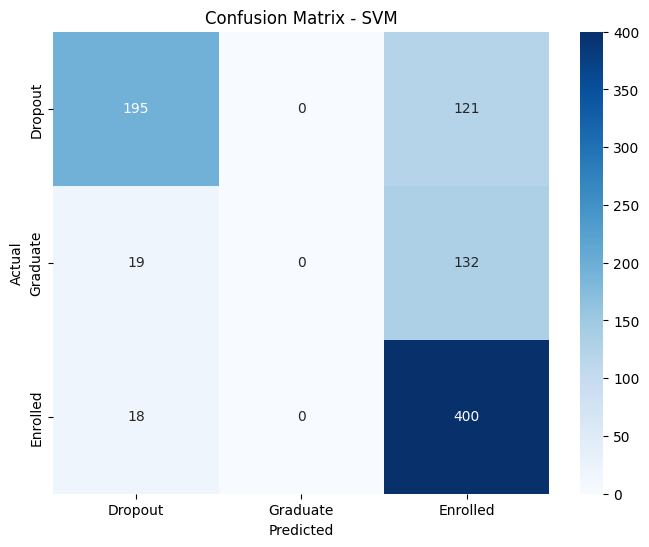

In [72]:
y_svm_pred = svm_model.predict(test_pca_df)
accuracy_svm = accuracy_score(new_y_test, y_svm_pred)
precision_svm = precision_score(new_y_test, y_svm_pred, average='weighted')
recall_svm = recall_score(new_y_test, y_svm_pred, average='weighted')
f1_svm = f1_score(new_y_test, y_svm_pred, average='weighted')

print(f"SVM - Accuracy: {accuracy_svm:.5f}")
print(f"SVM - Precision: {precision_svm:.5f}")
print(f"SVM - Recall: {recall_svm:.5f}")
print(f"SVM - F1 Score: {f1_svm:.5f}")

cm_svm = confusion_matrix(new_y_test, y_svm_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Dari hasil SVM, terlihat data memiliki hasil evaluasi yang cukup rendah, yaitu 47%, sehingga model ini kemungkinan kurang sesuai untuk klasifikasi tiga label target.

## Decision Tree

Decision Tree - Accuracy: 0.68588
Decision Tree - Precision: 0.66090
Decision Tree - Recall: 0.68588
Decision Tree - F1 Score: 0.65618


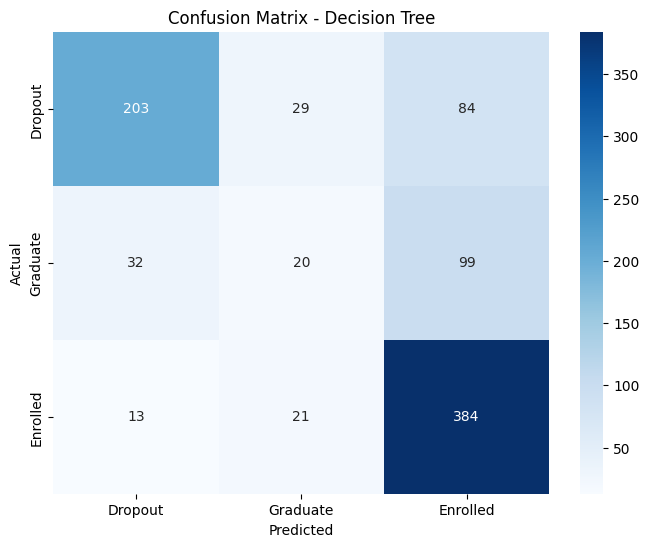

In [73]:
y_tree_pred = tree_model.predict(test_pca_df)

accuracy_tree = accuracy_score(new_y_test, y_tree_pred)
precision_tree = precision_score(new_y_test, y_tree_pred, average='weighted')
recall_tree = recall_score(new_y_test, y_tree_pred, average='weighted')
f1_tree = f1_score(new_y_test, y_tree_pred, average='weighted')

print(f"Decision Tree - Accuracy: {accuracy_tree:.5f}")
print(f"Decision Tree - Precision: {precision_tree:.5f}")
print(f"Decision Tree - Recall: {recall_tree:.5f}")
print(f"Decision Tree - F1 Score: {f1_tree:.5f}")

cm_dt = confusion_matrix(new_y_test, y_tree_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Decision Tree terlihat memiliki hasil yang lebih baik dari SVM, DT memiliki hasil evaluasi yang cukup baik, yaitu sekitar 68%, sehingga model ini kemungkinan lebih sesuai untuk klasifikasi tiga label target.

## Random Forest

Random Forest - Accuracy: 0.71751
Random Forest - Precision: 0.70196
Random Forest - Recall: 0.71751
Random Forest - F1 Score: 0.67962


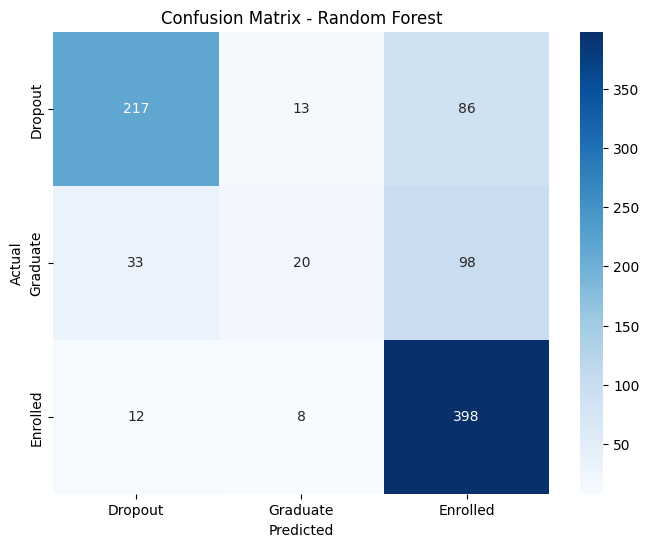

In [74]:
y_rdf_pred = rdf_model.predict(test_pca_df)

accuracy_rdf = accuracy_score(new_y_test, y_rdf_pred)
precision_rdf = precision_score(new_y_test, y_rdf_pred, average='weighted')
recall_rdf = recall_score(new_y_test, y_rdf_pred, average='weighted')
f1_rdf = f1_score(new_y_test, y_rdf_pred, average='weighted')

print(f"Random Forest - Accuracy: {accuracy_rdf:.5f}")
print(f"Random Forest - Precision: {precision_rdf:.5f}")
print(f"Random Forest - Recall: {recall_rdf:.5f}")
print(f"Random Forest - F1 Score: {f1_rdf:.5f}")

cm_rdf = confusion_matrix(new_y_test, y_rdf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rdf, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Dari Random Forest terlihat evaluasi lebih meningkat lagi, yaitu sekitar 72%, sehingga model ini lebih sesuai untuk klasifikasi tiga label target. Random Forest lebih unggul dibanding Decision TRee.

## XGBoost

XGBoost - Accuracy: 0.71751
XGBoost - Precision: 0.69826
XGBoost - Recall: 0.71751
XGBoost - F1 Score: 0.69368


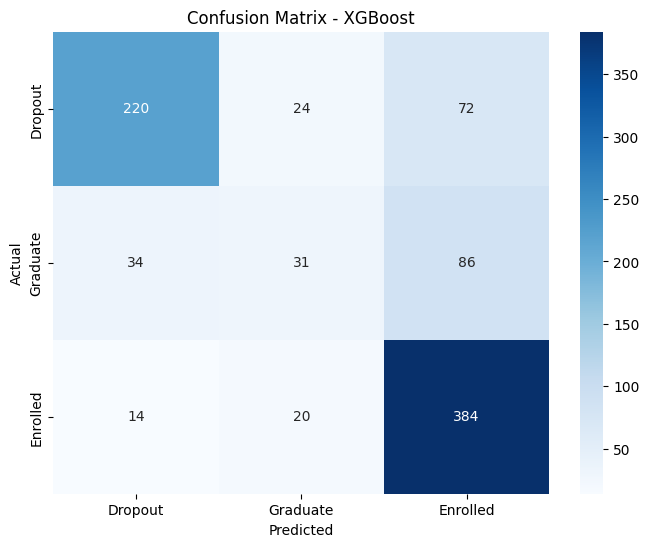

In [75]:
y_xgb_pred = xgb_model.predict(test_pca_df)
accuracy_xgb = accuracy_score(new_y_test, y_xgb_pred)
precision_xgb = precision_score(new_y_test, y_xgb_pred, average='weighted')
recall_xgb = recall_score(new_y_test, y_xgb_pred, average='weighted')
f1_xgb = f1_score(new_y_test, y_xgb_pred, average='weighted')

print(f"XGBoost - Accuracy: {accuracy_xgb:.5f}")
print(f"XGBoost - Precision: {precision_xgb:.5f}")
print(f"XGBoost - Recall: {recall_xgb:.5f}")
print(f"XGBoost - F1 Score: {f1_xgb:.5f}")

cm_xgb = confusion_matrix(new_y_test, y_xgb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Dari hasil XGBoost terlihat evaluasi hampir sama seperti Random Forest, yaitu sekitar 71%, sehingga model ini cukup sesuai untuk klasifikasi tiga label target. Random Forest masih lebih unggul 1% dari XGBoost.

Sebenarnya dari ketiga model tersebut belum ada model yang memiliki performa yang sangat baik dalam menangani data. Namun, berdasarkan hasil evaluasi ini, dapat disimpulkan bahwa model dengan performa terbaik adalah Random Forest. Model inilah yang akan digunakan dalam membuat prototype sederhana untuk mengidentifikasi dropout pada mahasiswa

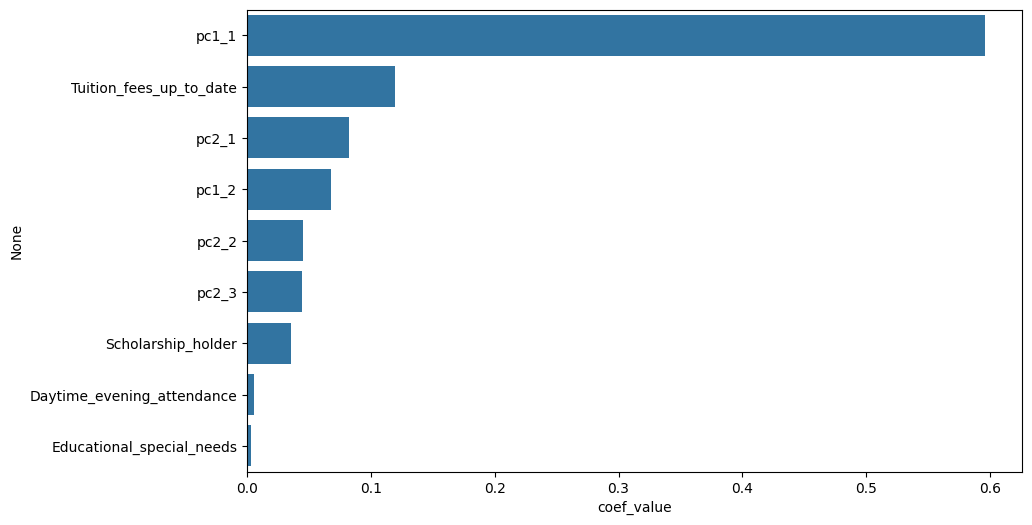

coef_value
pc1_1                         0.595985
Tuition_fees_up_to_date       0.119626
pc2_1                         0.082024
pc1_2                         0.067501
pc2_2                         0.045301
pc2_3                         0.044565
Scholarship_holder            0.035553
Daytime_evening_attendance    0.005841
Educational_special_needs     0.003605

In [76]:
def plot_feature_importances(feature_importances, cols):
    features = pd.DataFrame(feature_importances, columns=['coef_value']).set_index(cols)
    features = features.sort_values(by='coef_value', ascending=False)
    top_features = features

    plt.figure(figsize=(10, 6))
    sns.barplot(x='coef_value', y=features.index, data=features)
    plt.show()
    return top_features

plot_feature_importances(tree_model.feature_importances_, train_pca_df.columns)

In [77]:
joblib.dump(xgb_model, "model/xgb_model.joblib")

['model/xgb_model.joblib']

In [78]:
joblib.dump(rdf_model, "model/rdf_model.joblib")

['model/rdf_model.joblib']

In [79]:
cleaned_df.to_csv('cleaned_df.csv', index=False)

In [80]:
new_cleaned_df.to_csv('new_cleaned_df.csv', index=False)

In [81]:
pip freeze > requirements.txt